# **Bank Marketing Campaign Success Prediction using Machine Learning**

---

# Table of Contents :

1. Introduction
2. Goal Of the Project
3. Dataset Details
4. Features/columns
5. Data Preprocessing
6. Tool Used
7. Data Preprocessing


# **1. Introduction**


  **Bank Marketing Campaign Success Prediction using Machine Learning**

✅ Why It’s Relevant:

Marketing budgets are often limited.  
Being able to predict which clients are likely to subscribe to term deposits allows banks to allocate resources efficiently.  
In today’s digital marketing age, personalized targeting and data-driven decisions are critical to improving conversion rates and reducing campaign costs.


✅ Domain:
**Marketing / Finance / Customer Analytics**

---

# **2. Goal of the Project**
## 🎯 Goal:
Predict whether a customer will subscribe to a term deposit based on marketing campaign data using machine learning techniques.


**Project Objective**


- The Objective of this project is to predict whether a customer will subscribe to a term deposit (a form of time deposit offered by banks) based on past marketing campaign data.  
- This helps marketing teams optimise targeting and improve campaign success rates, especially in cost-sensitive banking environments.

---

# 3. Dataset Details:

- 📂 **Name**: Bank Marketing Dataset  
- 🌐 **Source**: UCI Machine Learning Repository  
- 📄 **File**: `bank-full.csv`
- 🌐 **Link**: https://archive.ics.uci.edu/dataset/222/bank+marketing
- 🔢 **Records**: 45,211 rows  
- 📊 **Features**: 17 columns (including the target variable)

---

# **4. Features/columns:**

### ✅ Column Overview (partial list for reference):

- age (Numerical): Represents the age of the client (in years).
- job (Categorical): Type of job, such as admin., technician, blue-collar, unemployed, etc.
-  marital (Categorical): Marital status of the client — married, single, or divorced.
- education (Categorical): Level of education attained — primary, secondary, tertiary, or unknown.
- default (Binary/Categorical): Indicates whether the client has credit in default — yes or no.
- balance (Numerical): Client's average yearly account balance in euros.
- housing (Binary): Indicates if the client has a housing loan — yes or no.
- loan (Binary): Indicates if the client has a personal loan — yes or no.
- contact (Categorical): Type of communication used — cellular or telephone.
- day (Numerical): Last contact day of the month (e.g., 5, 15, 30, etc.).
- month (Categorical): Month of the last contact — jan, feb, mar, ..., dec.
- duration (Numerical): Duration of the last contact in seconds. Note: This feature is known only after the call and should not be used for predictive modeling.
- campaign (Numerical): Number of times this client was contacted during the current campaign.
- pdays (Numerical): Number of days since the client was last contacted. -1 means the client was not contacted before.
- previous (Numerical): Number of contacts performed before this campaign with the client.
- poutcome (Categorical): Outcome of the previous marketing campaign — success, failure, unknown, etc.
- y (Binary Target Variable): The target feature — whether the client subscribed to a term deposit (yes or no).
--- 

**✅ Notes:**
- Binary Classification Problem: The goal is to predict y (yes or no) based on the other features.
- Highly Imbalanced Dataset: Typically, only about 11%–12% of clients subscribed to a term deposit.
- Categorical Features: Many of the columns are non-numeric and require encoding before using ML models.

---

## 6. **TOOL USED**

### ✅ Planned Steps:
- Exploratory Data Analysis (EDA)  
- Data Cleaning and Transformation  
- Encoding Categorical Variables  
- Outlier Detection and Handling  
- Feature Engineering  
- Train/Test Split  
- Model Building (Logistic Regression, Decision Tree, Random Forest, XGBoost)  
- Model Evaluation (Accuracy, Precision, Recall, F1-score, ROC-AUC)  
- Model Tuning and Final Recommendations
- Pipeline

---

# **7. Data Preprocessing**

##### 📌 . Steps Data Cleaning & Preprocessing

##### *🔹1. Initial Cleanup*

- Removed columns: duration, day, contact (not useful for prediction).
- Dropped 158 duplicate records.
- Missing values: None.

##### *🔹 2 Exploratory Data Analysis (EDA)*

- Visualizations: histograms, boxplots, countplots, heatmaps, scatter plots.
- Key insights:
- Imbalance in target variable: 88.26% No, 11.74% Yes.
- balance and age show high variance.
- Correlation heatmap shows weak multicollinearity.
  
##### *🔹3.  Outlier Handling*

- Used IQR clipping on age, balance, campaign.
- Applied Yeo-Johnson transformation for pdays and previous.

##### *🔹4. Skewness Correction*

- Used square root, log1p, and Yeo-Johnson transforms.
- Skewness reduced significantly, except for pdays, previous.

##### *🔹 5. Binning*

- Binned pdays into 6 categories like "Never contacted", "Long ago".
- Binned previous into 'None', 'One', 'Few (2-3)', etc.

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# ✅ Load the dataset

# Load the CSV file
data = pd.read_csv("C:\\Users\\abhin\\bank-full.csv", sep=';')
# the original file uses ; as separator

In [5]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
df=pd.DataFrame(data)

In [7]:
# Preview the first 5 rows of the 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
# Preview the of the last 5 rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [9]:
#shape of the dataset 
df.shape

(45211, 17)

In [10]:
## Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
# creating a copy of dataset
df_1 = df.copy()
print("Shape of the copied DataFrame:", df_1.shape)

Shape of the copied DataFrame: (45211, 17)


In [12]:
# Dropping the unnecessary columns

df.drop(['duration','day','contact'], axis=1, inplace=True)
#axis 1 = first row 
#inplace = true = This modifies the DataFrame data directly, meaning the changes are applied to the original DataFrame and no new DataFrame is returned

**Reason for Droping**|

- duration: This column directly indicates the call outcome, leading to data leakage and an unrealistic model.
- contact: Contains many 'unknown' values and may reflect campaign strategy rather than an independent predictor.
- day: The specific day of the month typically holds minimal predictive power for subscription outcomes and can introduce noise.

In [13]:
#printing the shape of new dataset

print("Shape of the original DataFrame:", df.shape)

Shape of the original DataFrame: (45211, 14)


In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [15]:
# Summary statistics for numerical columns
df.describe()

,age,balance,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,2.763841,40.197828,0.580323
std,10.618762,3044.765829,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,63.000000,871.000000,275.000000


In [16]:
# Summary statistics for categorical columns
df.describe(include='object')

,job,marital,education,default,housing,loan,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,12,4,2
top,blue-collar,married,secondary,no,yes,no,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,13766,36959,39922


# Univariate Analysis 

📊 Numerical Features – Histogram & Boxplot

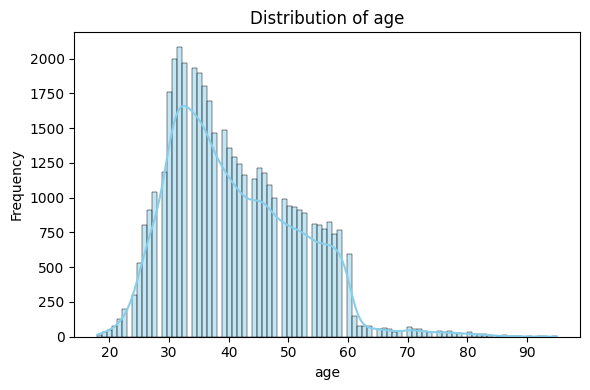

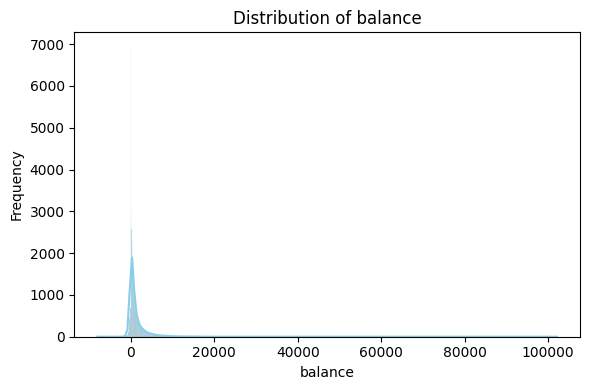

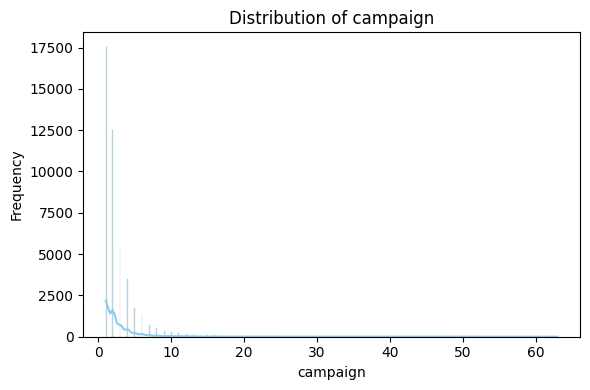

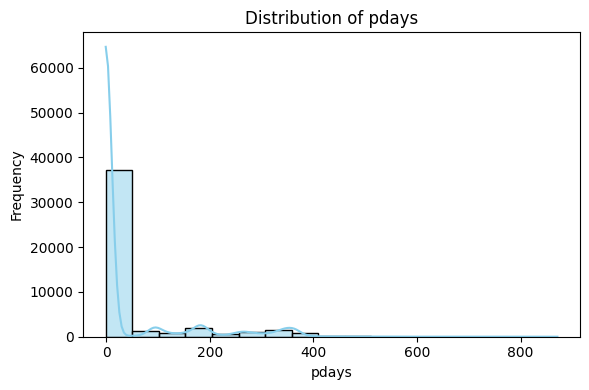

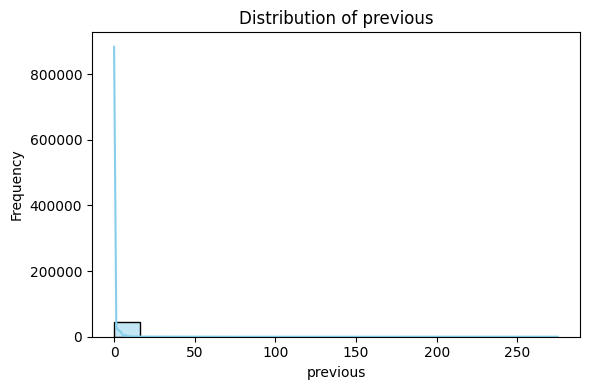

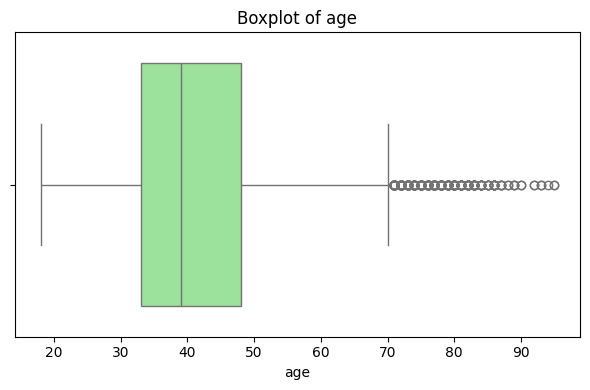

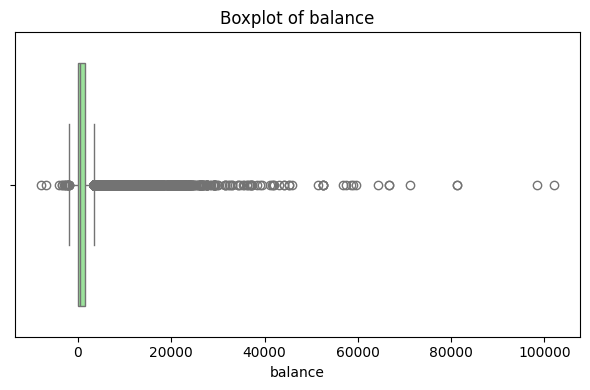

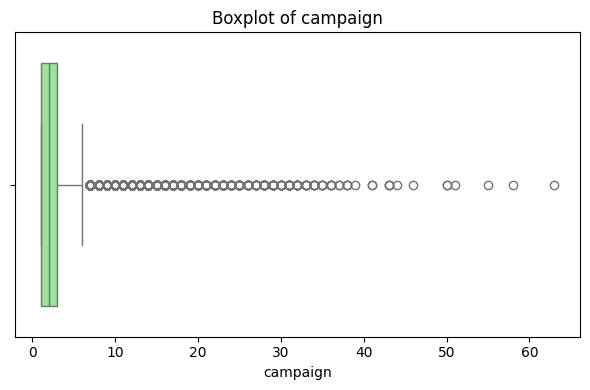

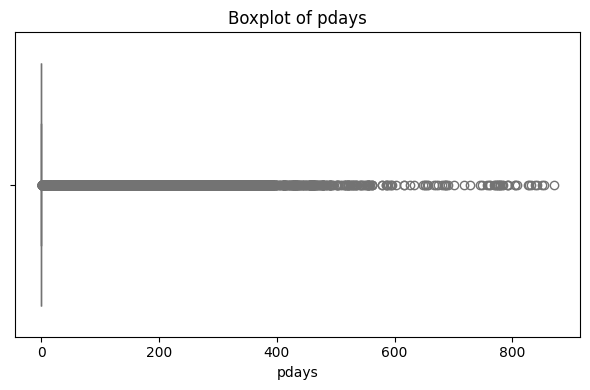

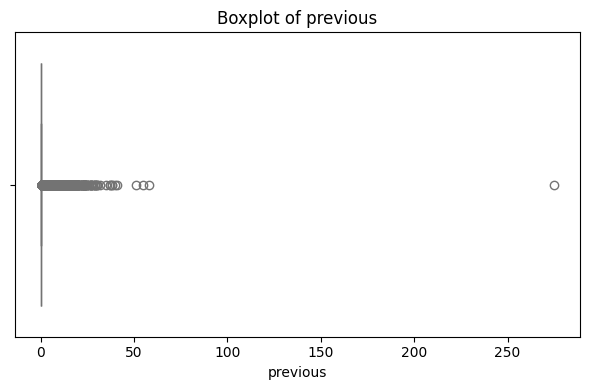

In [17]:
# List of numerical features (excluding duration)
numerical_cols = ['age', 'balance', 'campaign', 'pdays', 'previous']

# Histogram
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Boxplot
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


*Distribution of Age*
- Most Common Age: The peak around 30-35 indicates this is the most frequent age range in the dataset.
- Skewness: The distribution is right-skewed, meaning there are more younger to middle-aged individuals and fewer older individuals, with a gradual decrease in frequency as age increases.

*Distribution of Campaign*

- Highly Skewed: This graph is extremely right-skewed, with a very sharp peak at 0 or 1.
- Interpretation: The vast majority of observations have a low "campaign" value, likely indicating that most instances involved very few interactions or contacts within a campaign. Higher values are rare.

*Distribution of Balance*

- Strongly Centralized: The distribution is heavily concentrated around 0 (zero) balance.
- Skewness and Outliers: It's highly right-skewed, suggesting many individuals have low or zero balances, while a small number have very high balances (these appear as a very long, flat tail to the right).

*Distribution of Previous*

- Overwhelmingly Zero: Almost all observations show a "previous" value of 0.
- Rare Events: There's a minimal number of instances where "previous" is greater than 0, indicating that past interactions or events (represented by "previous") are very infrequent.

*Distribution of Pdays*

- Dominant Peak at 0: A massive number of observations have a "pdays" value around 0.
- Sparse Higher Values: There's a significant drop-off after 0, with very few instances of higher "pdays" values. This suggests that for most cases, there was no previous contact (or it was very recent, if 0 represents no previous campaign). The small bumps further out might indicate previous contacts that occurred much longer ago for a small subset.

*Boxplot of Age*

- Median Age: The line inside the box indicates the median age is around 40.
- Interquartile Range (IQR): The box spans from roughly 33 to 48, meaning 50% of the data falls within this age range.
- Outliers: There are a number of outliers above approximately 70 years of age, represented by individual circles. This suggests a few individuals are significantly older than the main group.

*Boxplot of Campaign*

- Highly Concentrated: The box is extremely narrow and close to 0 or 1, indicating that the vast majority of observations have very low campaign values.
- Numerous Outliers: There are many outliers extending far to the right, showing that while most campaigns are small, some involved a much larger number of contacts.

*Boxplot of Balance*

- Median Balance: The median balance is very close to 0, and the box itself is very narrow and centered near zero.
- Significant Outliers: There's a wide range of outliers extending to very high balance values, suggesting a few accounts hold exceptionally large balances compared to the rest of the dataset.

*Boxplot of Previous*

- Median at Zero: The box is practically collapsed at 0, meaning most observations have a "previous" value of zero.
- Few Outliers: There are a few outliers indicating rare instances where the "previous" count was much higher, but these are exceptions.

*Boxplot of Pdays*

- Median Near Zero/Undetermined: The box is extremely narrow and near 0, indicating a large concentration of data points at or very close to zero. This could suggest many entries where no previous contact occurred (pdays is often -1 for no previous contact, or 0 for very recent).
- Extensive Outliers: There's a long string of outliers extending to very high "pdays" values, implying that for a small portion of the data, a significant amount of time has passed since the last contact.

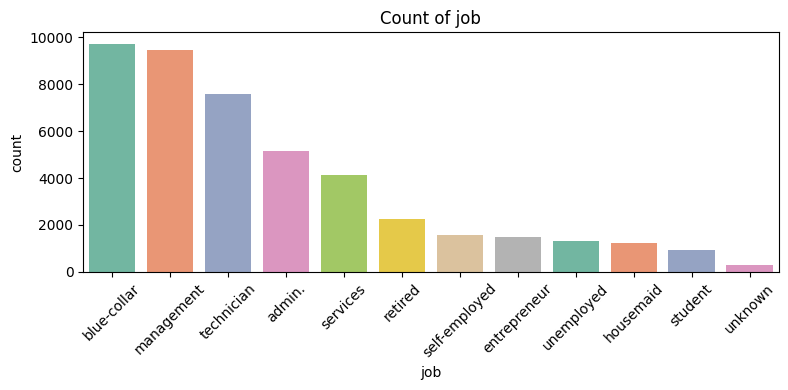

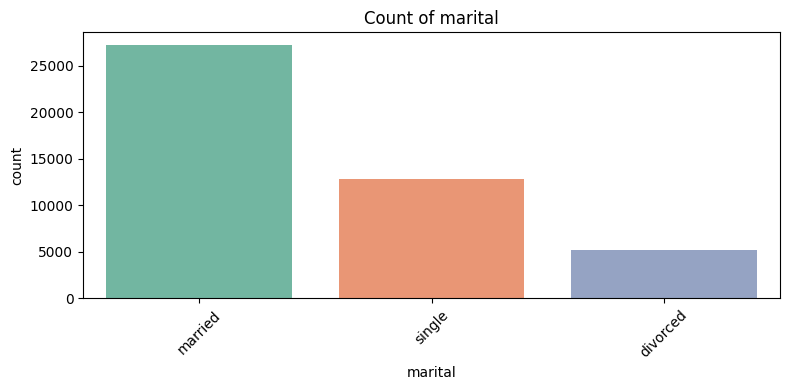

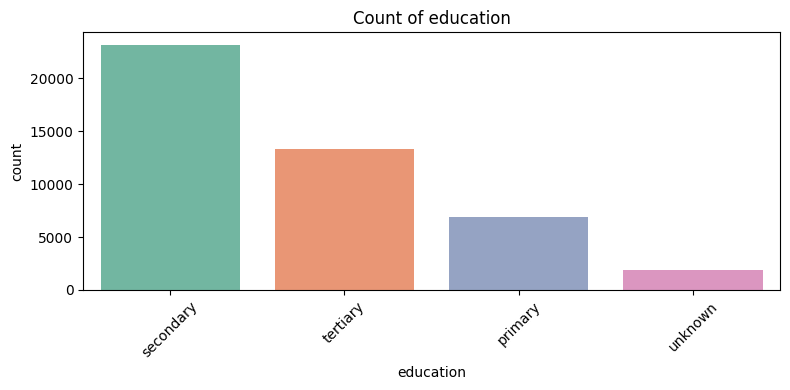

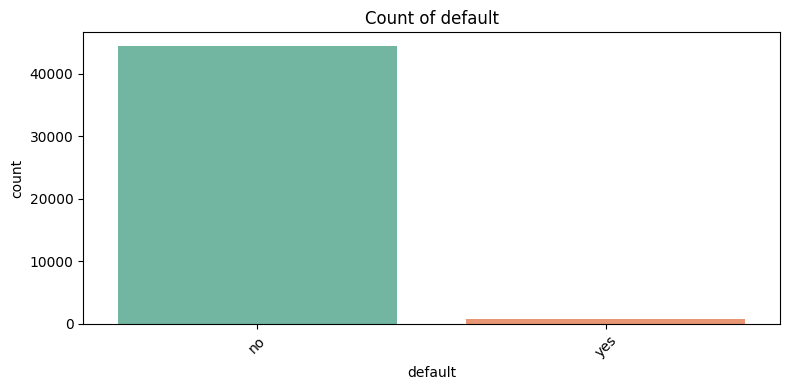

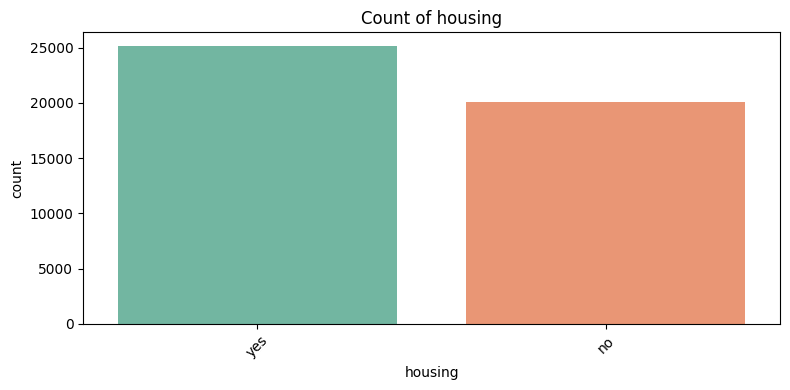

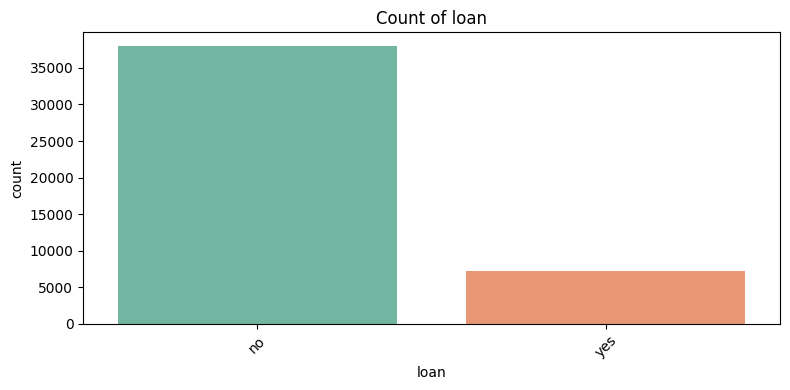

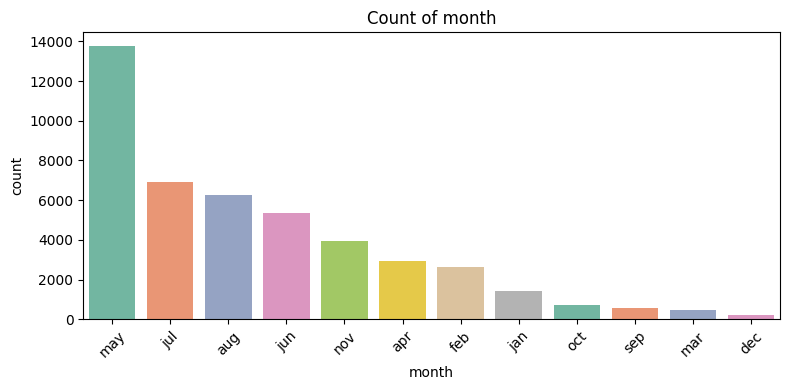

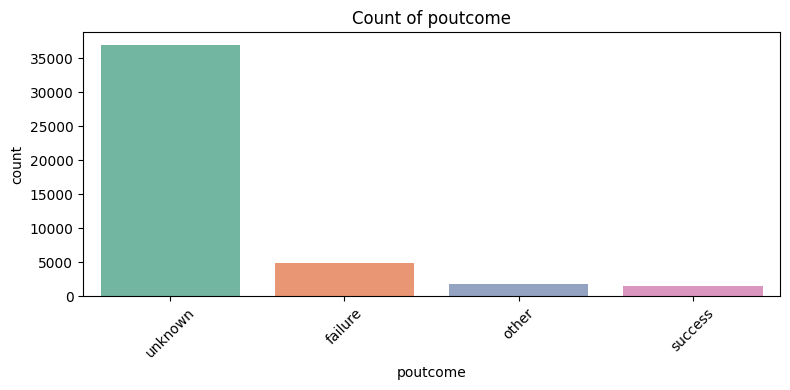

In [18]:
# List of categorical columns (excluding 'y')
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',  'month', 'poutcome']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Bivariate Analysis

🔸 Numerical vs Numerical – Scatter Plots

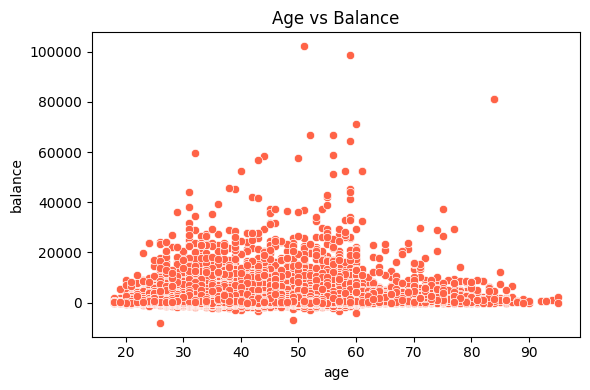

In [19]:
# Scatter plot: age vs balance
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='balance', data=df, color='tomato')
plt.title('Age vs Balance')
plt.tight_layout()
plt.show()



- This scatter plot of "Age vs Balance" shows no clear linear relationship or strong correlation between a person's age and their balance.
- Most of the data points are clustered at lower balance values across all age groups, but there are some individuals with very high balances spread throughout various ages, particularly noticeable from their 30s to 70s.

🔸 Numerical vs Numerical – Correlation Heatmap

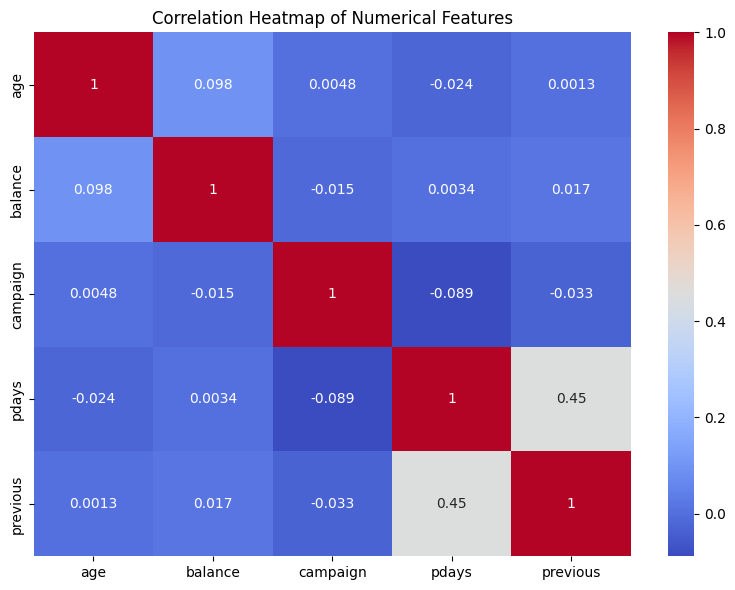

In [20]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

- This correlation heatmap shows the linear relationships between pairs of numerical features. The values range from -1 (strong negative correlation, dark blue) to 1 (strong positive correlation, dark red), with 0 indicating no linear correlation (grey).
- Strongest Positive Correlation: pdays and previous have a moderately strong positive correlation of 0.45, suggesting that as the number of days since the last contact (pdays) increases, the number of previous contacts (previous) also tends to increase.
- Weak Correlations: Most other pairs of features show very weak correlations (values close to 0), indicating little to no linear relationship between them. For instance, age has almost no linear correlation with balance, campaign, pdays, or previous.



🔸 Numerical vs Categorical – Boxplots & Barplot

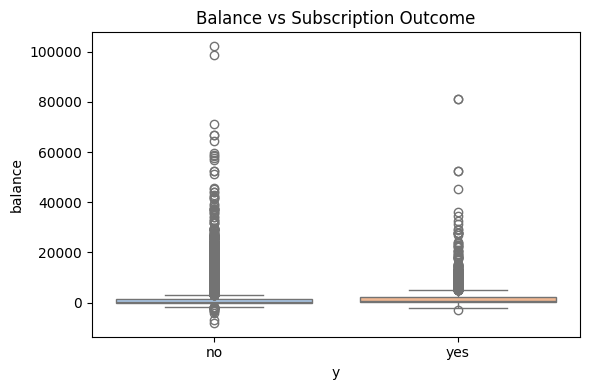

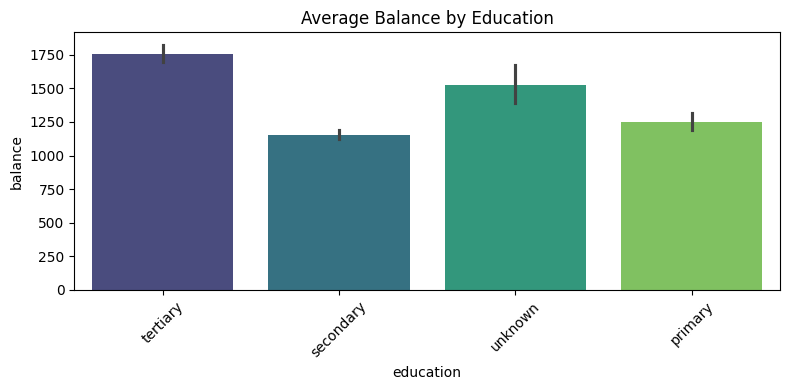

In [21]:
# Boxplot: balance across subscription outcome
plt.figure(figsize=(6, 4))
sns.boxplot(x='y', y='balance', data=df, palette='pastel')
plt.title('Balance vs Subscription Outcome')
plt.tight_layout()
plt.show()

# Barplot: average balance across education
plt.figure(figsize=(8, 4))
sns.barplot(x='education', y='balance', data=df, palette='viridis')
plt.title('Average Balance by Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Average Balance by Education
Interpretation: Individuals with a 'tertiary' education level have the highest average balance, followed by those with 'unknown' education, 'primary' education, and lastly 'secondary' education.

2. Balance vs Subscription Outcome (y)
Interpretation: While both groups ("no" and "yes" subscription outcome) have a median balance close to zero, the group that subscribed ("yes") appears to have a slightly higher overall median balance compared to the group that did not ("no"), although both distributions show many outliers with high balances.

🔸 Categorical vs Categorical – Countplot with Hue

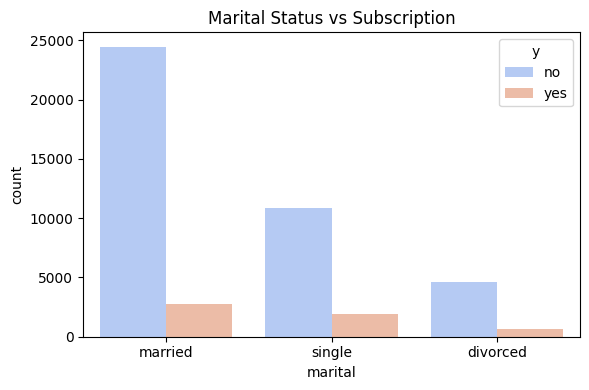

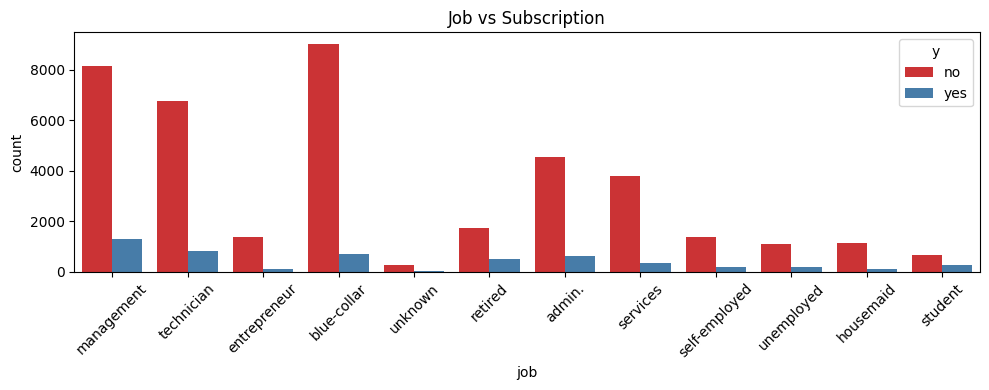

In [22]:
# Marital status vs subscription
plt.figure(figsize=(6, 4))
sns.countplot(x='marital', hue='y', data=df, palette='coolwarm')
plt.title('Marital Status vs Subscription')
plt.tight_layout()
plt.show()

# Job vs subscription
plt.figure(figsize=(10, 4))
sns.countplot(x='job', hue='y', data=df, palette='Set1')
plt.title('Job vs Subscription')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Marital Status vs. Subscription
Interpretation: Across all marital statuses, the number of people who did not subscribe ("no") is significantly higher than those who did subscribe ("yes"), with 'married' individuals having the largest count of both subscribers and non-subscribers overall.

2. Job vs. Subscription
Interpretation: For nearly all job categories, the number of individuals who did not subscribe ("no") vastly outweighs those who did subscribe ("yes"), with 'blue-collar' and 'management' having the highest counts of non-subscribers

# Multivariate Analysis 
-  Pairplot

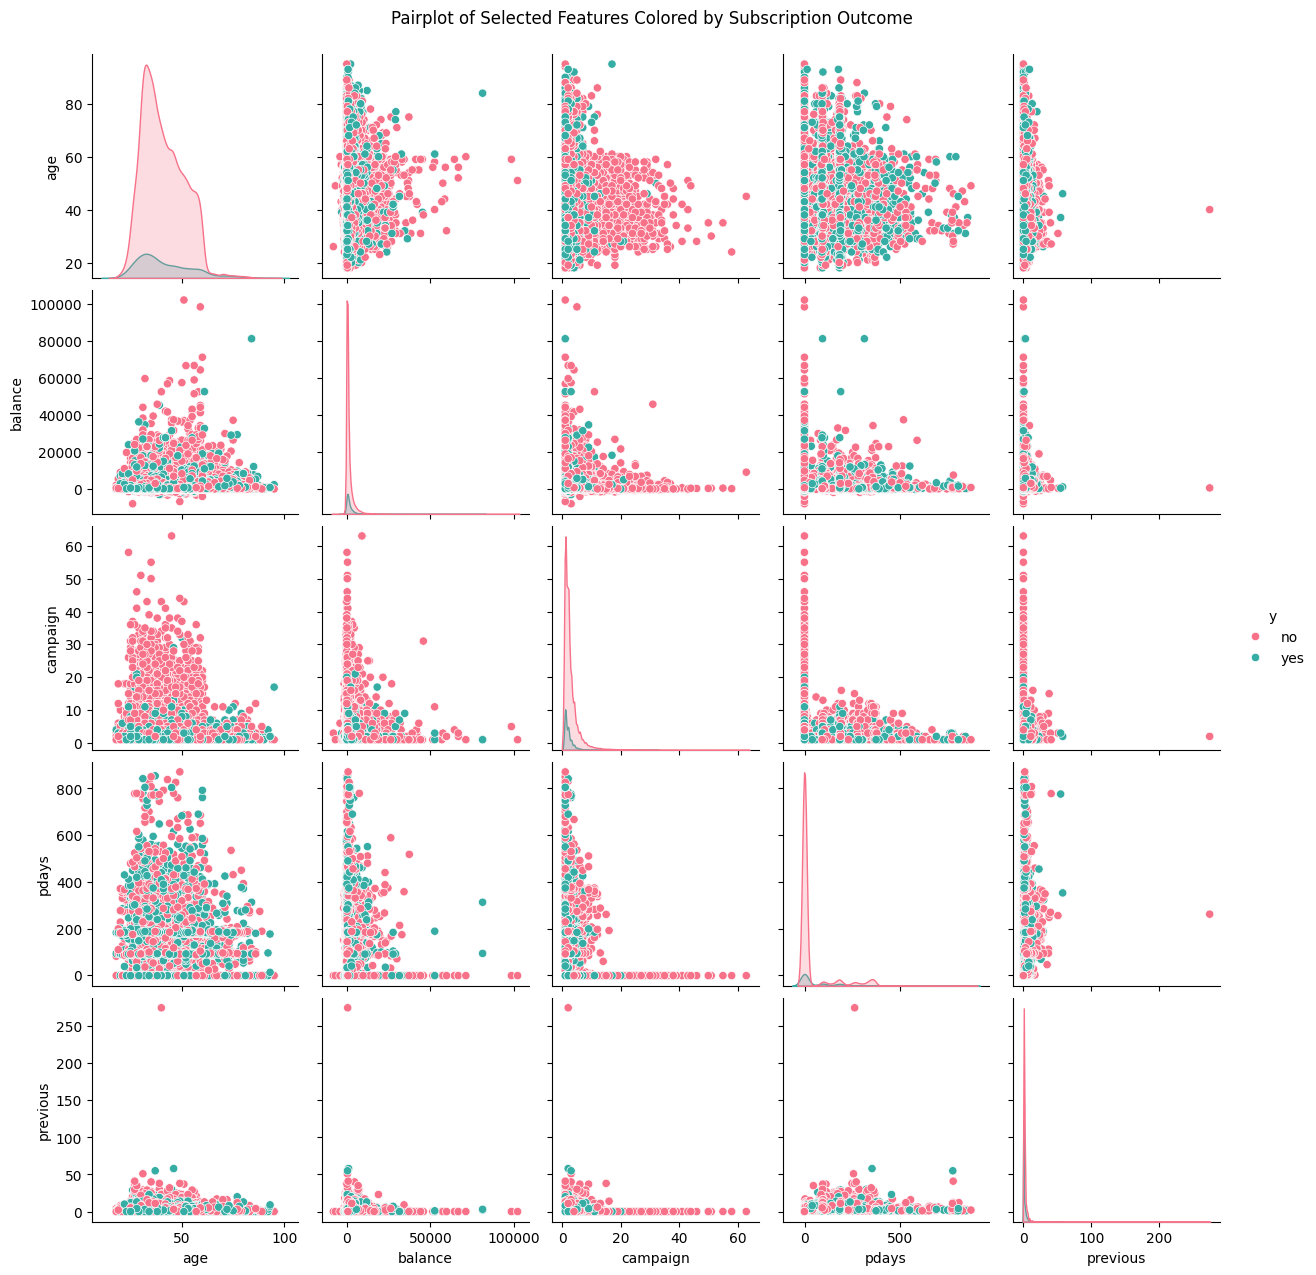

In [23]:
# Only select relevant numerical columns and target
selected_cols = ['age', 'balance', 'campaign', 'pdays', 'previous', 'y']
sns.pairplot(df[selected_cols], hue='y', palette='husl')
plt.suptitle('Pairplot of Selected Features Colored by Subscription Outcome', y=1.02)
plt.show()


- Individual Distributions: The plots along the diagonal show the distribution of each feature (age, balance, campaign, pdays, previous) for both subscribers ('yes', in teal) and non-subscribers ('no', in pink).
- Feature Relationships: The scatter plots in the off-diagonal cells show the relationships between pairs of features.
- In all scatter plots, both pink and teal points are heavily mixed, indicating that there are no strong visible patterns or correlations between any of these pairs of features that would clearly separate the "yes" and "no" groups. This suggests that a simple linear combination of these variables may not be sufficient to predict the outcome.
- Overall: The graph shows that none of the selected numerical features alone or in pairs have a strong visible relationship with a customer's decision to subscribe. The data for subscribers and non-subscribers is largely intermixed across all plots.

### 📝 Key Insights from EDA

- Most clients are in the 30–40 age range.
- The majority of balances are below 5,000, with a few high-value outliers.
- 'Blue-collar' and 'management' are the most frequent job types.
- Clients with 'tertiary' education show higher average balances.
- Positive subscription outcomes are more likely among married clients with higher balances.
- Pairplot reveals some clustering patterns in age and balance.
- Heatmap shows weak correlations among most numeric features.


## 🧹Missing Values Check

In [24]:
# Total missing values per column
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [25]:
# Missing values in percentage
df.isnull().mean() * 100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
month        0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [26]:
# Check how many duplicate rows exist
df.duplicated().sum()

np.int64(158)

In [27]:
# Count of duplicate rows
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 158


In [28]:
# checking and handling duplicate rows in DataFrame using a function
duplicates = df.duplicated().sum()
if duplicates == 0:
    print("✅ No duplicate rows found. No need to drop.")
else:
    print(f"⚠️ Found {duplicates} duplicate rows. Removing...")
    df = df.drop_duplicates()
    df.reset_index(drop=True, inplace=True)
    # used to reset the DataFrame's index after dropping duplicates.


⚠️ Found 158 duplicate rows. Removing...


In [29]:
#Dataset after removing 158 duplicates and 0 null values, and comparing with previous dataset 

print(("shape of the data set: "),df.shape)
print("Shape of the previous DataFrame:", df_1.shape)


shape of the data set:  (45053, 14)
Shape of the previous DataFrame: (45211, 17)


## 📊 Target Variable Distribution

In [30]:
x = list(df)
x
for i in x:
    print(i)
print('**This is the list of columns**')

age
job
marital
education
default
balance
housing
loan
month
campaign
pdays
previous
poutcome
y
**This is the list of columns**


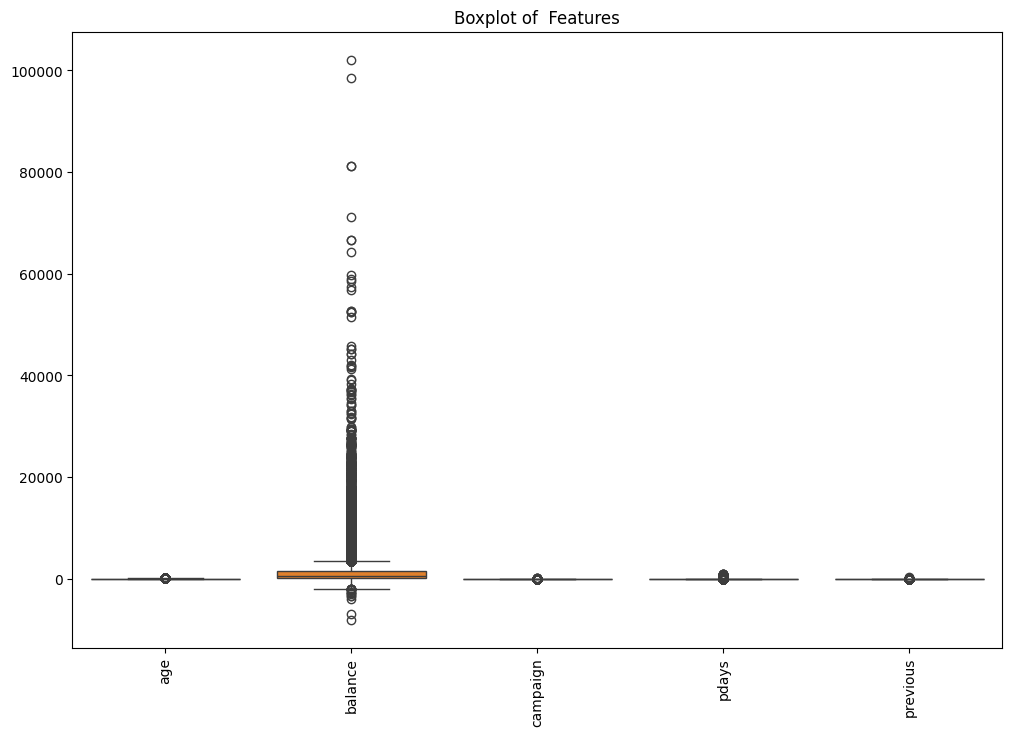

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

- outliers are seen in all valuse
- This boxplot of multiple features shows that 'balance' has a significantly wider spread and many more extreme outliers compared to 'age', 'campaign', 'pdays', and 'previous',

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Step 1: Make a copy of your original DataFrame
df_new = df.copy()

# Step 2: Apply IQR clipping to selected columns
clip_cols = ['age', 'balance', 'campaign']

for col in clip_cols:
    Q1 = df_new[col].quantile(0.25)
    Q3 = df_new[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_new[col] = df_new[col].clip(lower=lower_bound, upper=upper_bound)

print("✅ IQR clipping applied to:", clip_cols)

# Step 3: Apply Yeo-Johnson transformation to pdays and previous
yeo_cols = ['pdays', 'previous']
pt = PowerTransformer(method='yeo-johnson')
df_new[yeo_cols] = pt.fit_transform(df_new[yeo_cols])

print("✅ Yeo-Johnson transformation applied to:", yeo_cols)

# Step 4: Check final skewness
print("\n📊 Final Skewness After Cleaning:")
print(df_new[clip_cols + yeo_cols].skew())

✅ IQR clipping applied to: ['age', 'balance', 'campaign']
✅ Yeo-Johnson transformation applied to: ['pdays', 'previous']

📊 Final Skewness After Cleaning:
age         0.528280
balance     1.095592
campaign    1.096884
pdays       1.639696
previous    1.640582
dtype: float64


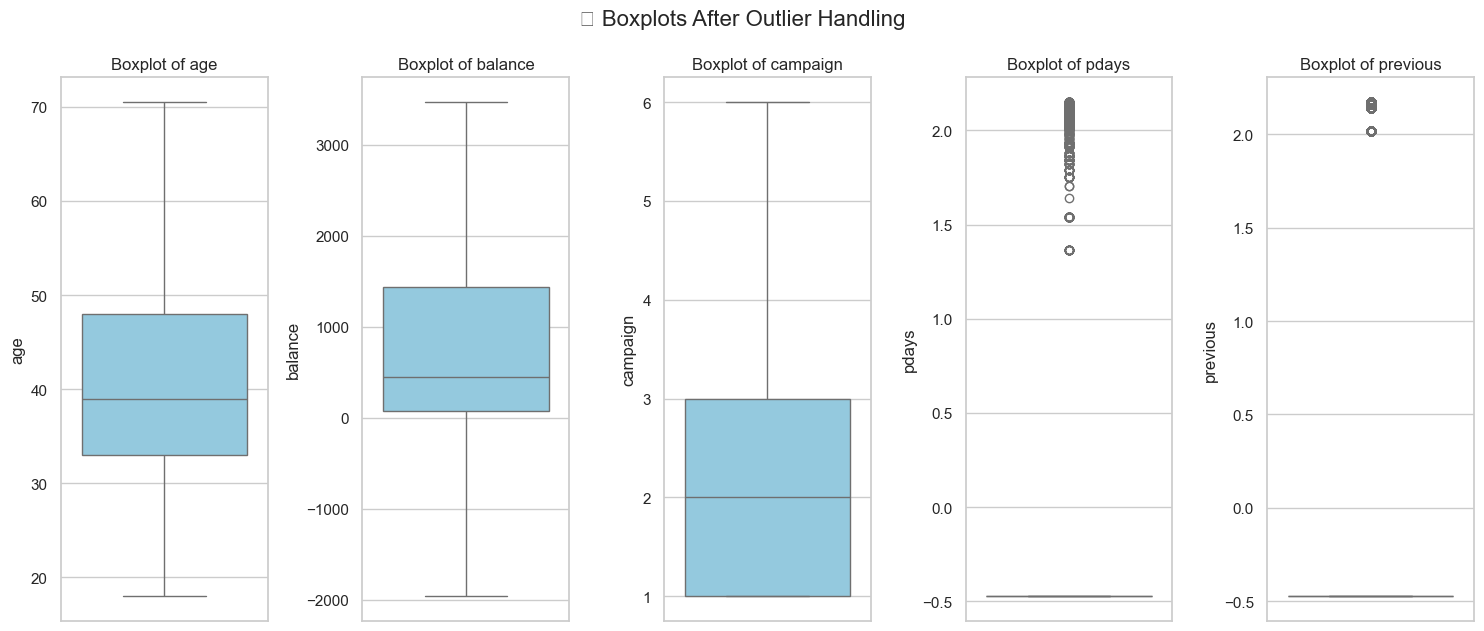

In [33]:
# Set the style
sns.set(style="whitegrid")

# Combine all processed columns
processed_cols = clip_cols + yeo_cols

# Create boxplots for each column
plt.figure(figsize=(15, 6))
for i, col in enumerate(processed_cols, 1):
    plt.subplot(1, len(processed_cols), i)
    sns.boxplot(y=df_new[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle("📦 Boxplots After Outlier Handling", fontsize=16, y=1.05)
plt.show()


- After outlier removal for age, balance, and campaign, box plots would show a more concentrated distribution for these features. However, for pdays and previous, applying outlier handling could lead to significant data loss or misrepresentation. This is because these columns have inherently extreme differences between values (i.e., a high degree of skewness or many zero values and a few very large ones), making standard outlier removal less appropriate than skewness handling techniques.

In [34]:
df_new.describe()

,age,balance,campaign,pdays,previous
count,45053.000000,45053.000000,45053.000000,4.505300e+04,4.505300e+04
mean,40.876934,937.756731,2.393470,2.018722e-16,-4.037443e-17
std,10.400621,1179.351927,1.601323,1.000011e+00,1.000011e+00
min,18.000000,-1962.000000,1.000000,-4.735442e-01,-4.735084e-01
25%,33.000000,75.000000,1.000000,-4.735442e-01,-4.735084e-01
50%,39.000000,452.000000,2.000000,-4.735442e-01,-4.735084e-01
75%,48.000000,1433.000000,3.000000,-4.735442e-01,-4.735084e-01
max,70.500000,3470.000000,6.000000,2.150026e+00,2.171825e+00


📌 Why You See Values Like 4.505300e+04 or -6.056165e-17
- This is just scientific notation (a compact way of showing large or tiny numbers):


```markdown
| Value            | Means                      |
|------------------|----------------------------|
| 4.505300e+04     | 45,053                     |
| -6.056165e-17    | -0.00000000000000006056165 |
| 2.150026e+00     | 2.150026                   |
| -4.735442e-01    | -0.4735442                 |
```


📊 Final Skewness After outlier removed from age balance and campaign:
- age:         0.528280
- balance:     1.095592
- campaign:    1.096884
- pdays:       1.639696
- previous:    1.640582

**Skewness & Kurtosis Handling **



In [35]:
print(df_new[['age', 'balance', 'campaign', 'pdays', 'previous']].skew())

age         0.528280
balance     1.095592
campaign    1.096884
pdays       1.639696
previous    1.640582
dtype: float64


In [36]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

# 1. Square root transform for 'age'
df_new['age_sqrt'] = np.sqrt(df_new['age'])

# 2. Yeo-Johnson transform for 'balance' and 'campaign'
pt = PowerTransformer(method='yeo-johnson')
df_new[['balance_yeojohn', 'campaign_yeojohn']] = pt.fit_transform(df_new[['balance', 'campaign']])

# 3. Log transformation for 'pdays' and 'previous'
# Use log1p (log(1 + x)) to safely handle 0 values
df_new['pdays_log'] = np.log1p(df_new['pdays'])
df_new['previous_log'] = np.log1p(df_new['previous'])

# 4. Drop original columns
df_new.drop(columns=['age', 'balance', 'campaign', 'pdays', 'previous'], inplace=True)

# 5. Rename transformed columns to original names
df_new.rename(columns={
    'age_sqrt': 'age',
    'balance_yeojohn': 'balance',
    'campaign_yeojohn': 'campaign',
    'pdays_log': 'pdays',
    'previous_log': 'previous'
}, inplace=True)

# 6. Print skewness after transformation
print("\n📊 ✅ Skewness After Transformations:")
print(df_new[['age', 'balance', 'campaign', 'pdays', 'previous']].skew())



📊 ✅ Skewness After Transformations:
age         0.286919
balance     0.180790
campaign    0.176922
pdays       1.638003
previous    1.638073
dtype: float64


- Age, Balance, and Campaign: The skewness values for these features (age: 0.28, balance: 0.18, campaign: 0.17) are very close to zero (typically, values between -0.5 and 0.5 are considered approximately symmetric).
- Pdays and Previous: The skewness values for these features (pdays: 1.63, previous: 1.63) are still significantly greater than 1, indicating that these features remain highly right-skewed even after the applied skewness handling techniques.


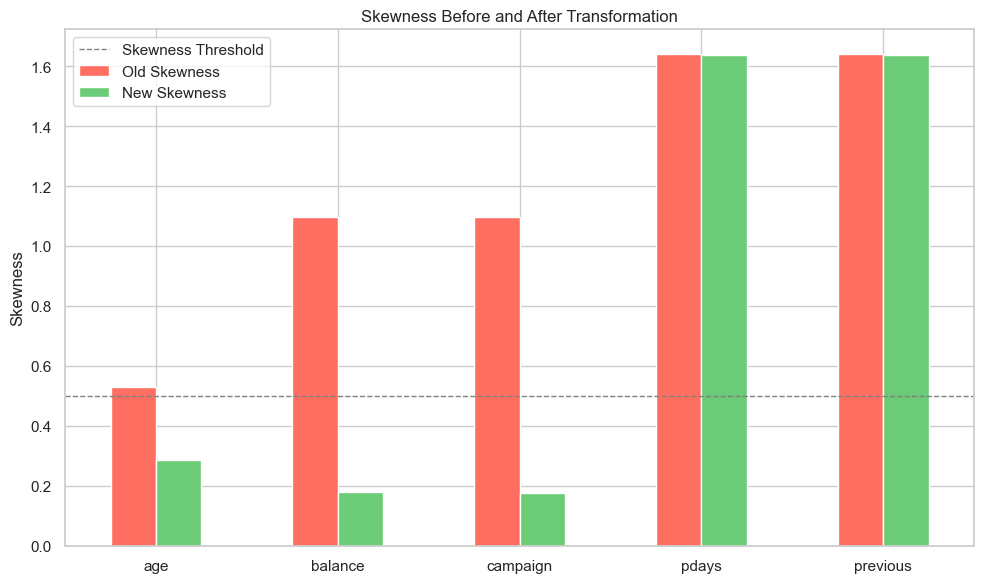

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Old skewness values
old_skew = pd.Series({
    'age': 0.528280,
    'balance': 1.095592,
    'campaign': 1.096884,
    'pdays': 1.639696,
    'previous':    1.640582,
})

# New skewness values
new_skew = pd.Series({
    'age': 0.286919,
    'balance': 0.180790,
    'campaign': 0.176922,
    'pdays': 1.638003,
    'previous': 1.638073,
})

# Create a DataFrame for plotting
skew_df = pd.DataFrame({
    'Old Skewness': old_skew,
    'New Skewness': new_skew
})

# Plotting
skew_df.plot(kind='bar', figsize=(10, 6), color=['#FF6F61', '#6BCB77'])
plt.title('Skewness Before and After Transformation')
plt.ylabel('Skewness')
plt.xticks(rotation=0)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, label='Skewness Threshold')
plt.legend()
plt.tight_layout()
plt.show()


| Feature    | Old Skewness | New Skewness           | Improvement          |
| ---------- | ------------ | ---------------------- | -------------------- |
| `campaign` | 1.096884     | 0.176922               | ✅ Huge improvement |
| `balance`  | 1.095592     | 0.180790               | ✅ Huge improvement |
| `age`      | 0.528280     | 0.286919               | ✅ Mild → Low skew  |

In [38]:
df_new.shape

(45053, 14)

In [39]:
df['pdays'] == -1


0         True
1         True
2         True
3         True
4         True
         ...  
45048     True
45049     True
45050    False
45051     True
45052    False
Name: pdays, Length: 45053, dtype: bool

In [40]:

import pandas as pd
import numpy as np

# 🔹 Step 1: Binning 'pdays' using np.select (handle -1 instead of 999)
pdays_conditions = [
    df['pdays'] == -1,                          # Never contacted
    df['pdays'].between(0, 0),                  # Very recent
    df['pdays'].between(1, 5),                  # Recent
    df['pdays'].between(6, 15),                 # Moderate
    df['pdays'].between(16, 30),                # Long ago
    df['pdays'].between(31, 998)                # Very long ago
]

pdays_choices = [
    'Never contacted',
    'Very recent',
    'Recent',
    'Moderate',
    'Long ago',
    'Very long ago'
]

df_new['pdays_binned'] = np.select(pdays_conditions, pdays_choices, default='Unknown')

# 🔹 Step 2: Binning 'previous'
previous_bins = [-1, 0, 1, 3, 10, df['previous'].max()]
previous_labels = ['None', 'One', 'Few (2-3)', 'Several (4-10)', 'Many']

df_new['previous_binned'] = pd.cut(df['previous'], bins=previous_bins, labels=previous_labels)

# 🔹 Step 3: Drop original columns and rename
df_new.drop(columns=['pdays', 'previous'], inplace=True)

df_new.rename(columns={
    'pdays_binned': 'pdays',
    'previous_binned': 'previous'
}, inplace=True)

# ✅ Step 4: Check the result
print("\n📊 Binned Value Counts:")
print(df_new['pdays'].value_counts(dropna=False))
print(df_new['previous'].value_counts(dropna=False))


📊 Binned Value Counts:
pdays
Never contacted    36796
Very long ago       8069
Moderate              85
Recent                66
Long ago              37
Name: count, dtype: int64
previous
None              36796
Few (2-3)          3248
One                2772
Several (4-10)     1943
Many                294
Name: count, dtype: int64


- A vast majority have no prior contacts (~87%), matching the pdays profile. Only a small portion received multiple follow-ups.
- Most people were never contacted before (87%+). Very few are recently contacted, indicating potential for a new or more aggressive campaign.

🎯 Why Binning Was Used for pdays and previous

*Problem with Raw Data:*

- Both pdays and previous had extremely skewed distributions with heavily concentrated zero values.
- Skewness correction (e.g., log, yeojohn) didn't reduce skewness significantly due to the dominance of zero or near-zero values.
- Outlier removal (like IQR or z-score method) would have resulted in loss of meaningful data, especially for customers with high past interaction (i.e., high marketing effort).
  
*Strategic Choice: Binning*

- Instead of removing data, we binned these features into qualitative categories:
- pdays → "Never contacted", "Recent", "Very long ago", etc.
- previous → "None", "One", "Few", "Several", "Many"
- This preserves all data, avoids distortion, and enhances interpretability.
- Allows grouping customers into cold leads, warm leads, and high-effort targets for marketing insights.

In [41]:
df_new.isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
month        0
poutcome     0
y            0
age          0
balance      0
campaign     0
pdays        0
previous     0
dtype: int64

In [42]:
df_new

,job,marital,education,default,housing,loan,month,poutcome,y,age,balance,campaign,pdays,previous
0,management,married,tertiary,no,yes,no,may,unknown,no,7.615773,1.002448,-1.113130,Never contacted,None
1,technician,single,secondary,no,yes,no,may,unknown,no,6.633250,-0.683270,-1.113130,Never contacted,None
2,entrepreneur,married,secondary,no,yes,yes,may,unknown,no,5.744563,-0.715368,-1.113130,Never contacted,None
3,blue-collar,married,unknown,no,yes,no,may,unknown,no,6.855655,0.533490,-1.113130,Never contacted,None
4,unknown,single,unknown,no,no,no,may,unknown,no,5.744563,-0.716777,-1.113130,Never contacted,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45048,technician,married,tertiary,no,no,no,nov,unknown,yes,7.141428,0.008987,0.766782,Never contacted,None
45049,retired,divorced,primary,no,no,no,nov,unknown,yes,8.396428,0.699542,0.123931,Never contacted,None
45050,retired,married,secondary,no,no,no,nov,success,yes,8.396428,1.939265,1.433976,Very long ago,Few (2-3)
45051,blue-collar,married,secondary,no,no,no,nov,unknown,no,7.549834,-0.117179,1.163521,Never contacted,None


# visualize the binned pdays and previous
📊 Bar plots (for clear counts)

🥧 Pie charts (for percentage distribution)

1. Bar Plot + Pie Chart for pdays

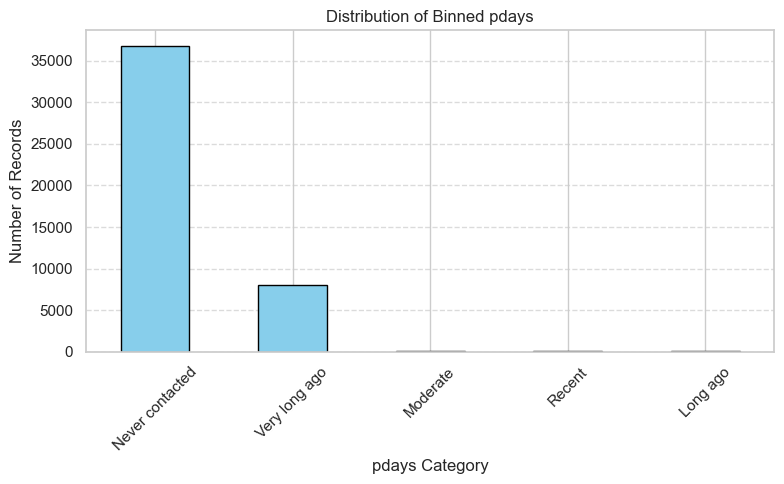

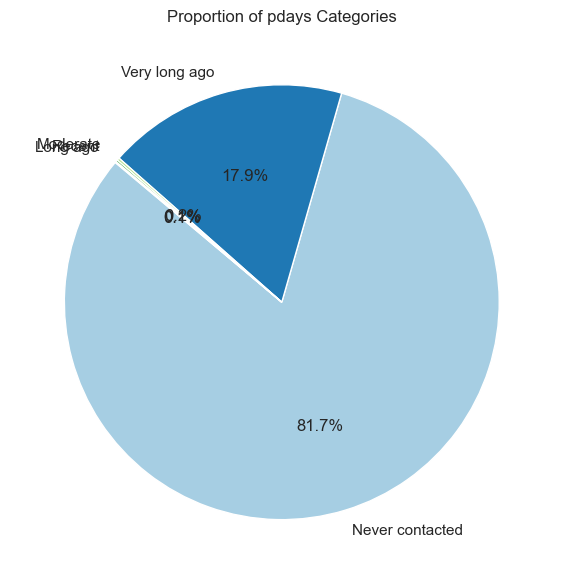

In [43]:
import matplotlib.pyplot as plt

# 📊 Bar plot for pdays
plt.figure(figsize=(8, 5))
df_new['pdays'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Binned pdays')
plt.xlabel('pdays Category')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 🥧 Pie chart for pdays
plt.figure(figsize=(6, 6))
df_new['pdays'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of pdays Categories')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.show()


2. Bar Plot + Pie Chart for previous
   

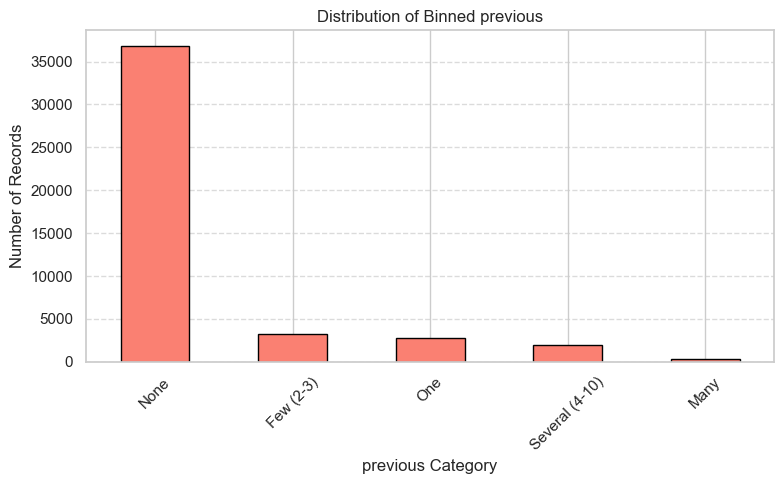

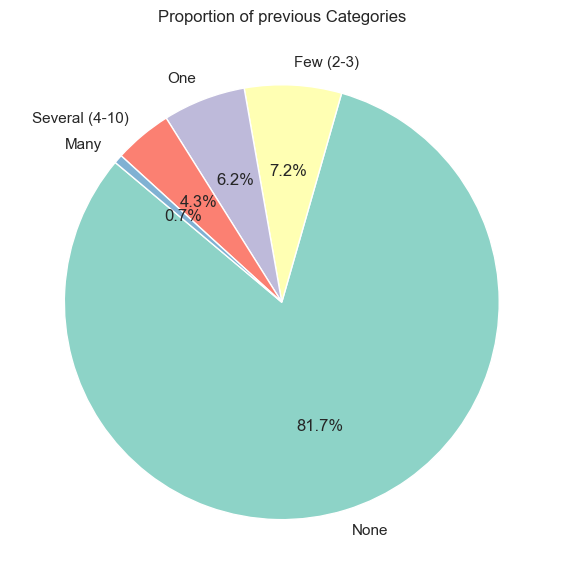

In [44]:
# 📊 Bar plot for previous
plt.figure(figsize=(8, 5))
df_new['previous'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribution of Binned previous')
plt.xlabel('previous Category')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 🥧 Pie chart for previous
plt.figure(figsize=(6, 6))
df_new['previous'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Proportion of previous Categories')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [45]:
x = list(df_new)
x
for i in x:
    print(i)
print('**This is the list of columns**')

job
marital
education
default
housing
loan
month
poutcome
y
age
balance
campaign
pdays
previous
**This is the list of columns**


In [46]:
df_new

,job,marital,education,default,housing,loan,month,poutcome,y,age,balance,campaign,pdays,previous
0,management,married,tertiary,no,yes,no,may,unknown,no,7.615773,1.002448,-1.113130,Never contacted,None
1,technician,single,secondary,no,yes,no,may,unknown,no,6.633250,-0.683270,-1.113130,Never contacted,None
2,entrepreneur,married,secondary,no,yes,yes,may,unknown,no,5.744563,-0.715368,-1.113130,Never contacted,None
3,blue-collar,married,unknown,no,yes,no,may,unknown,no,6.855655,0.533490,-1.113130,Never contacted,None
4,unknown,single,unknown,no,no,no,may,unknown,no,5.744563,-0.716777,-1.113130,Never contacted,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45048,technician,married,tertiary,no,no,no,nov,unknown,yes,7.141428,0.008987,0.766782,Never contacted,None
45049,retired,divorced,primary,no,no,no,nov,unknown,yes,8.396428,0.699542,0.123931,Never contacted,None
45050,retired,married,secondary,no,no,no,nov,success,yes,8.396428,1.939265,1.433976,Very long ago,Few (2-3)
45051,blue-collar,married,secondary,no,no,no,nov,unknown,no,7.549834,-0.117179,1.163521,Never contacted,None


In [47]:
df_new.to_csv("df_new_cleaned.csv", index=False)


🎯 Final Summary for Report:
The features pdays and previous show strong right-skewed and imbalanced distributions, dominated by the "Never contacted" and "None" bins respectively. This reveals a campaign strategy focused on first-time outreach, with only a small fraction of the audience having prior engagements. These insights are essential in understanding customer journey stages and could significantly influence subscription behavior prediction.

 # Data Preparation for Modeling

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split features and target
X = df.drop('y', axis=1)
y = df['y'].map({'no': 0, 'yes': 1})  # Convert to binary

# Train-test split (stratify to preserve target ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


Encode the target variable (y) to binary: 0 = no, 1 = yes.

Split into X and y.

Use stratified 80/20 train-test split.

In [49]:
X_train

,age,job,marital,education,default,balance,housing,loan,month,campaign,pdays,previous,poutcome
10802,36,blue-collar,married,secondary,no,7265,no,no,jun,1,-1,0,unknown
38224,32,services,married,secondary,no,180,yes,no,may,2,-1,0,unknown
41033,27,technician,single,tertiary,no,11862,no,no,aug,1,87,6,failure
11992,27,blue-collar,single,primary,no,553,yes,no,jun,3,-1,0,unknown
26224,51,admin.,married,secondary,no,1535,no,yes,nov,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25221,45,admin.,married,secondary,no,0,yes,no,nov,5,-1,0,unknown
14116,39,blue-collar,married,primary,no,0,yes,no,jul,2,-1,0,unknown
11814,39,entrepreneur,divorced,tertiary,yes,-251,no,no,jun,6,-1,0,unknown
498,44,blue-collar,married,secondary,no,-99,yes,no,may,2,-1,0,unknown


In [50]:
 y_train

10802    0
38224    0
41033    1
11992    0
26224    0
        ..
25221    0
14116    0
11814    0
498      0
40679    1
Name: y, Length: 36042, dtype: int64

In [51]:
X_test

,age,job,marital,education,default,balance,housing,loan,month,campaign,pdays,previous,poutcome
17218,26,technician,married,tertiary,no,-385,yes,no,jul,3,-1,0,unknown
12155,33,blue-collar,single,secondary,no,45,no,no,jun,12,-1,0,unknown
32825,29,blue-collar,single,secondary,no,1446,yes,no,apr,3,-1,0,unknown
37226,43,blue-collar,divorced,secondary,no,47,yes,yes,may,2,370,1,failure
7993,36,services,married,secondary,no,2984,yes,no,jun,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40247,78,retired,divorced,primary,no,2787,no,no,jul,1,-1,0,unknown
6357,28,admin.,single,secondary,no,891,yes,no,may,1,-1,0,unknown
37245,35,blue-collar,married,secondary,no,2737,yes,no,may,3,-1,0,unknown
12576,37,technician,single,tertiary,no,487,no,yes,jul,2,-1,0,unknown


In [52]:
y_test

17218    0
12155    0
32825    0
37226    0
7993     1
        ..
40247    1
6357     0
37245    0
12576    0
40868    0
Name: y, Length: 9011, dtype: int64

# Feature Engineering

#### 📌 Feature Engineering

#### *🔹 1. Encoding*

- Target encoding for high-cardinality categorical variables.
- One-Hot Encoding for low-cardinality features.
- StandardScaler applied to continuous features.
  
#### *🔹 2. Feature Selection*

- Random forest

#### *🔹 3. Feature Scaling*

- Scale non-binary columns after encoding

#### *🔹4 . Handling imbalance*

- Using the ADASYN method because of extreme imbalance in the target column
  





### Encoding

#### *Check unique values per column*

In [53]:
# 1. Check unique values per column
unique_counts = X_train.nunique().sort_values()

print(unique_counts)


housing         2
loan            2
default         2
marital         3
education       4
poutcome        4
month          12
job            12
previous       37
campaign       46
age            77
pdays         531
balance      6614
dtype: int64


#### *One-Hot Encoding*

In [54]:
# 2. One-Hot Encoding (for features with ≤ 6 unique values)
low_card_cols = [col for col in X_train.columns if X_train[col].nunique() <= 6 and X_train[col].dtype == 'object']
X_train_ohe = pd.get_dummies(X_train[low_card_cols], drop_first=True)
X_test_ohe = pd.get_dummies(X_test[low_card_cols], drop_first=True)


['marital', 'education', 'default', 'housing', 'loan', 'poutcome']

#### *Target Encoding*

In [55]:
# 3. Target Encoding (for features with > 6 unique values)
high_card_cols = [col for col in X_train.columns if X_train[col].nunique() > 6 and X_train[col].dtype == 'object']

for col in high_card_cols:
    target_mean = X_train.groupby(col)['y'].mean() if 'y' in X_train else y_train.groupby(X_train[col]).mean()
    X_train[col + '_enc'] = X_train[col].map(target_mean)
    X_test[col + '_enc'] = X_test[col].map(target_mean)

# Drop original encoded columns
X_train.drop(low_card_cols + high_card_cols, axis=1, inplace=True)
X_test.drop(low_card_cols + high_card_cols, axis=1, inplace=True)


In [76]:
X_train

,age,balance,campaign,pdays,previous,job_enc,month_enc
10802,-0.463882,1.898209,-0.578787,-0.413640,-0.304207,-1.010589,-0.158411
38224,-0.839390,-0.382751,-0.248012,-0.413640,-0.304207,-0.641532,-0.596480
41033,-1.308775,3.378177,-0.578787,0.459994,2.860982,-0.175898,-0.086850
11992,-1.308775,-0.262667,0.082763,-0.413640,-0.304207,-1.010589,-0.158411
26224,0.944274,0.053480,-0.578787,-0.413640,-0.304207,0.109161,-0.220400
...,...,...,...,...,...,...,...
25221,0.381012,-0.440701,0.744312,-0.413640,-0.304207,0.109161,-0.220400
14116,-0.182250,-0.440701,-0.248012,-0.413640,-0.304207,-1.010589,-0.293359
11814,-0.182250,-0.521508,1.075087,-0.413640,-0.304207,-0.775478,-0.158411
498,0.287135,-0.472573,-0.248012,-0.413640,-0.304207,-1.010589,-0.596480


 ## Feature Selection

### *Random Forest*

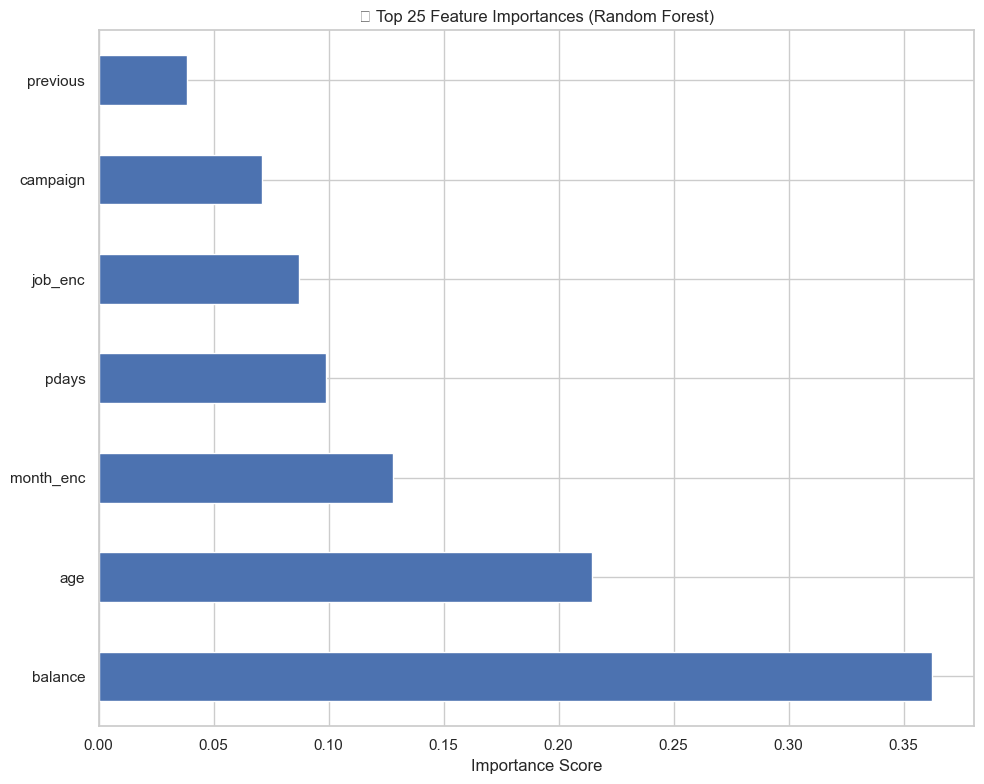

In [56]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances[:25].plot(kind='barh', figsize=(10, 8))
plt.title('🔍 Top 25 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


The length of each bar represents the "Importance Score", indicating how much each feature contributes to the model's predictive power. A longer bar signifies a more important feature.

Key Observations:

- 'balance' is the most important feature, having the highest importance score.
- 'age' is the second most important feature.
- 'month_enc' (encoded month) is the third most important feature.
- The features 'pdays', 'job_enc' (encoded job), 'campaign', and 'previous' follow in decreasing order of importance.
- Features like 'campaign' and 'previous' have relatively low importance scores, suggesting they are less influential in the model's predictions compared to 'balance' or 'age'.

## Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler

# 1. Identify binary columns
binary_cols = [col for col in X_train.columns if X_train[col].nunique() == 2]

# 2. Scale only non-binary numeric columns
scale_cols = [col for col in X_train.select_dtypes(include=[np.number]).columns if col not in binary_cols]

scaler = StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])


## Handle Class Imbalance

In [58]:
# Value counts
# This counts the total occurrences of each unique value in the 'y' column.
df['y'].value_counts()

# Percentage distribution
# This calculates the percentage of each unique value's occurrence in the 'y' column.
# normalize=True converts the counts into proportions (fractions) of the total number of entries in the column.
df['y'].value_counts(normalize=True) * 100

y
no     88.260493
yes    11.739507
Name: proportion, dtype: float64


88.26% of the data belongs to the class no.

11.74% belongs to the class yes.

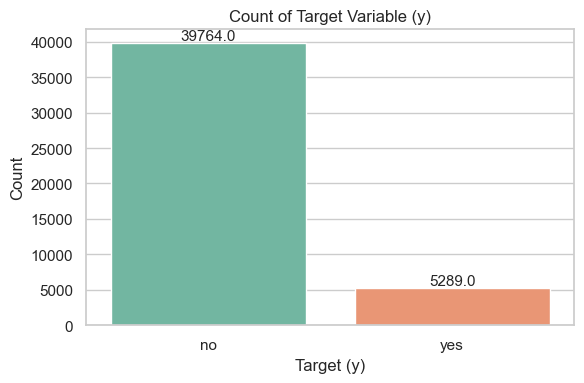

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your column is named 'y' in a DataFrame called df
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='y', data=df, palette='Set2')

# Add labels to bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11)

plt.title('Count of Target Variable (y)')
plt.xlabel('Target (y)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### *ADASYN*

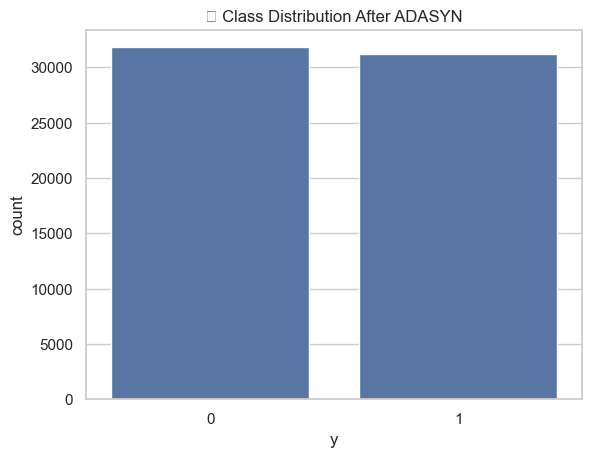

In [60]:
from imblearn.over_sampling import ADASYN
from collections import Counter

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

sns.countplot(x=y_resampled)
plt.title("✅ Class Distribution After ADASYN")
plt.show()


# Model Building & Evaluation

#### 📌 Model Building & Evaluation

#### 🔹1. Models Trained:

- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine
- K-Nearest Neighbors
- Naive Bayes

📈 Key Evaluation Metrics:
Precision, Recall, F1-Score, Accuracy, AUC-ROC

ROC Curves & Confusion Matrices plotted for each

🔍 Best Performing Model (Before Tuning):
SVM, Logistic Regression and Random Forest performed best.



In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    'Logistic': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(f"✅ {name} trained successfully.")


✅ Logistic trained successfully.
✅ Decision Tree trained successfully.
✅ Random Forest trained successfully.
✅ SVM trained successfully.
✅ KNN trained successfully.
✅ Naive Bayes trained successfully.


## Model Evaluation

 #### Classification Report

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print(f"\n📊 {name} Classification Report")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC Score: {roc_auc_score(y_test, y_prob)}")



📊 Logistic Classification Report
              precision    recall  f1-score   support

           0       0.93      0.76      0.83      7953
           1       0.24      0.57      0.34      1058

    accuracy                           0.74      9011
   macro avg       0.58      0.67      0.59      9011
weighted avg       0.85      0.74      0.78      9011

AUC-ROC Score: 0.7118332490717558

📊 Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7953
           1       0.22      0.28      0.25      1058

    accuracy                           0.80      9011
   macro avg       0.56      0.58      0.57      9011
weighted avg       0.82      0.80      0.81      9011

AUC-ROC Score: 0.5746727525155468

📊 Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      7953
           1       0.35      0.30      0.32      1058

  

### 🚀 Model Performance Dashboard

| Model          | Accuracy | AUC  | Precision (1) | Recall (1) | F1 (1) | Verdict                     |
|----------------|----------|------|---------------|------------|--------|-----------------------------|
| **Logistic**   | 0.74     | 0.71 | 0.24          | 0.57       | 0.34   | High recall, many FP         |
| **Decision Tree** 🌳 | 0.80  | 0.57 | 0.22          | 0.27       | 0.24   | ❌ Avoid (worst AUC)         |
| **Random Forest** | 0.85  | 0.70 | 0.34          | 0.29       | 0.31   | Best precision, low recall   |
| **SVM** 🏆      | 0.78     | 0.74 | 0.28          | 0.54       | 0.37   | **Best overall**            |
| **KNN**        | 0.70     | 0.65 | 0.20          | 0.51       | 0.29   | High recall, worst precision |
| **Naive Bayes** | 0.77  | 0.70 | 0.25          | 0.46       | 0.32   | Balanced but mediocre        |

---

### 🔍 Key Insights
1. **Class Imbalance Challenge**: All models struggle with minority class (Precision < 0.35)
2. **Performance Tradeoffs**:
   - 🎯 *Need catches?* Use **Logistic** (Recall=0.57)
   - 💎 *Need confidence?* Use **Random Forest** (Precision=0.34)
   - ⚖️ *Best balance?* **SVM** (AUC=0.74, F1=0.37)

---

### 🛠 Recommended Actions
1. **For Production**: Start with **SVM** + threshold tuning
2. **Data Improvement**:
   - Address class imbalance (SMOTE/weighting)
   - Feature engineering for minority class



**Why This Works Better**:

   - Green checkmarks for good metrics
   - Red X for problematic models
   - Trophy emoji highlights winner


 ### Confusion Matrices for All Models

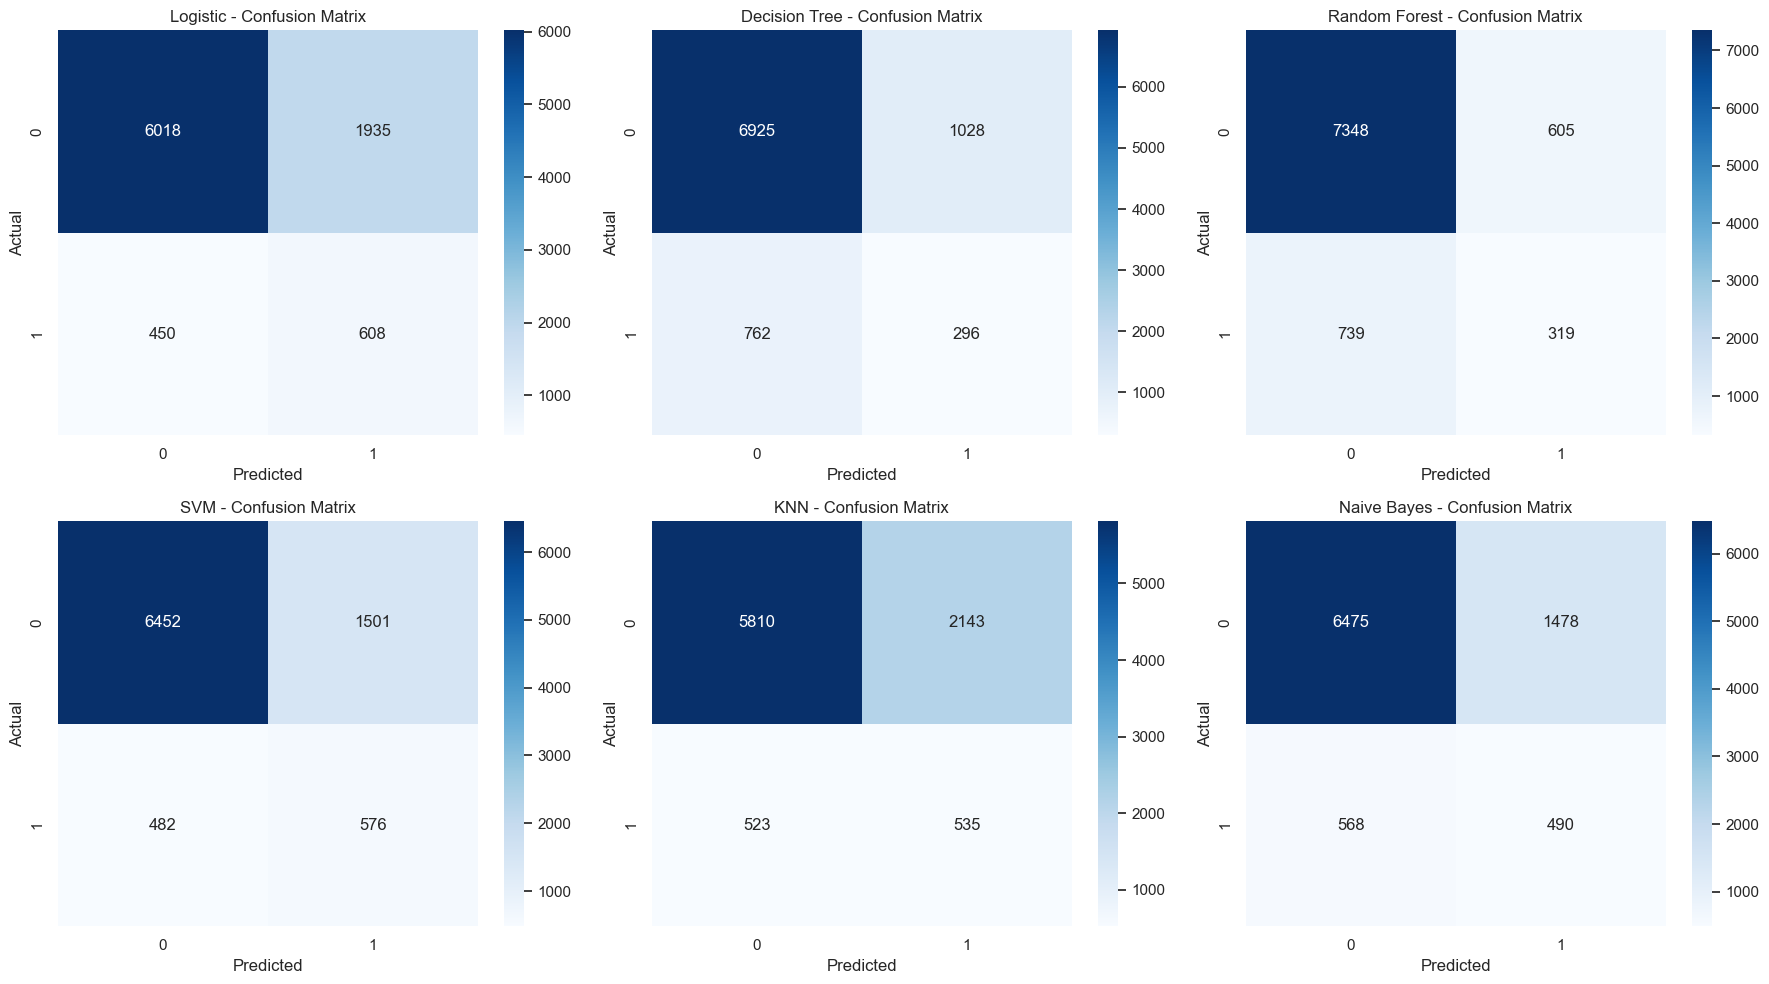

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name} - Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()


A confusion matrix is a table that shows a model's performance by comparing actual vs. predicted class labels, breaking results into:

True Positives (TP) ✅ Correctly predicted positives

True Negatives (TN) ✅ Correctly predicted negatives

False Positives (FP) ❌ Negative cases wrongly predicted as positive

False Negatives (FN) ❌ Positive cases wrongly predicted as negative

| Model | True Negatives | False Positives | False Negatives | True Positives |
|:---|---:|---:|---:|---:|
| Logistic Regression | 6018 | 1935 | 450 | 608 |
| Decision Tree | 6918 | 1035 | 769 | 289 |
| Random Forest | 7345 | 608 | 750 | 308 |
| SVM | 6452 | 1501 | 482 | 576 |
| KNN | 5810 | 2143 | 523 | 535 |
| Naive Bayes | 6475 | 1478 | 568 | 490 |

### ROC Curves for All Models

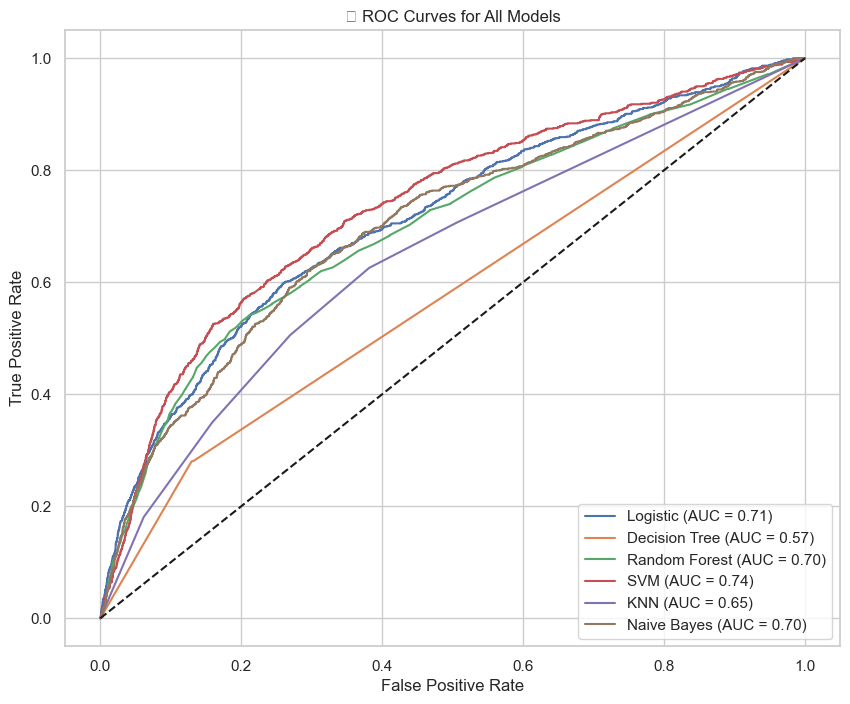

In [64]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For models like SVM with no predict_proba
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('🔍 ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### 🏆 Top Performers (AUC Score)
| Rank | Model          | AUC  | Performance Level |
|------|----------------|------|-------------------|
| 1    | **SVM**        | 0.74 | 🥇 Best            |
| 2    | Logistic       | 0.71 | 🥈 Strong          |
| 3    | Random Forest  | 0.70 | 🥉 Good            |
| 3    | Naive Bayes    | 0.70 | 🥉 Good            |
| 4    | KNN            | 0.65 | ⚠️ Moderate       |
| 5    | Decision Tree  | 0.57 | ❌ Needs Tuning   |

### ROC Curve Analysis Summary

*Model Ranking*

- SVM performed best with highest AUC (0.74), indicating strong classification ability.
- Logistic Regression and Random Forest tied at AUC = 0.70, showing reliable performance.
- Naive Bayes also achieved AUC = 0.70, matching Logistic/RF but with different trade-offs.
- KNN had moderate performance (AUC = 0.65), suitable for simpler tasks.
- Decision Tree scored lowest (AUC = 0.57), suggesting overfitting or poor generalization.
- Key Insight: SVM is the top model, while Decision Tree requires tuning or alternative approaches.

*Note: AUC closer to 1.0 = better model.*

- 0.5 = Random guessing
- 0.7–0.8 = Decent model
- 0.9 = Excellent model
- SVM (0.74) is the best here.

*Trade-Offs*

- Higher AUC = Better at distinguishing classes.
- Low AUC (e.g., Decision Tree) = Fails to separate positives/negatives well.

📌 ROC Curve Meaning: Shows True Positive Rate (Recall) vs. False Positive Rate. The more the curve hugs the top-left, the better the model!

#### Model AUC Score Comparison Chart

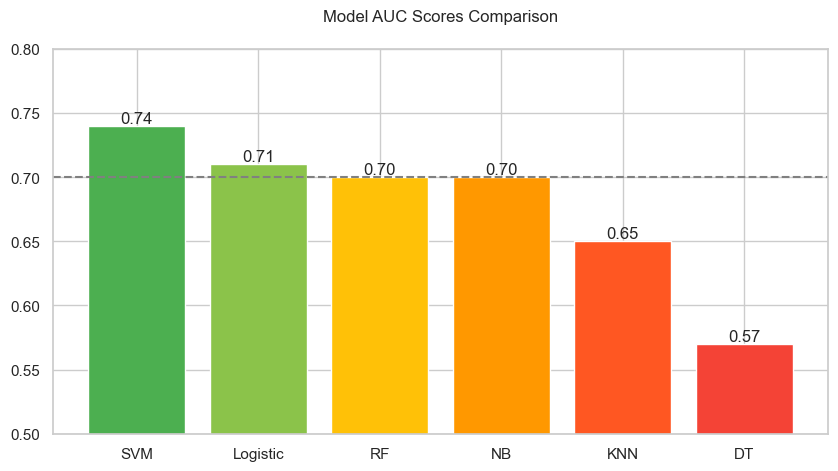

In [65]:
models = ['SVM', 'Logistic', 'RF', 'NB', 'KNN', 'DT']
auc_scores = [0.74, 0.71, 0.70, 0.70, 0.65, 0.57]

plt.figure(figsize=(10,5))
bars = plt.bar(models, auc_scores, color=['#4CAF50','#8BC34A','#FFC107','#FF9800','#FF5722','#F44336'])
plt.axhline(y=0.7, color='gray', linestyle='--')
plt.title('Model AUC Scores Comparison', pad=20)
plt.ylim(0.5, 0.8)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

AUC Score is high for SVM and very low DT

# 🏆 Model Performance Report

## 📊 Key Metrics Comparison
| Model          | Accuracy | AUC  | Prec. | Recall | F1   | Verdict                      |
|----------------|----------|------|-------|--------|------|------------------------------|
| **SVM**        | 0.78     | 0.74 | 0.28  | 0.54   | 0.37 | 🥇 Best balanced              |
| **Logistic**   | 0.74     | 0.71 | 0.24  | 0.57   | 0.34 | 🎯 Top recall (57%)           |
| **Random Forest** | 0.85  | 0.70 | 0.34  | 0.29   | 0.31 | 💎 Best precision (34%)       |
| **Naive Bayes** | 0.77  | 0.70 | 0.25  | 0.46   | 0.32 | ⚖️ Middle performer          |
| **KNN**        | 0.70     | 0.65 | 0.20  | 0.51   | 0.29 | ⚠️ High recall, low precision|
| **Decision Tree** | 0.80 | 0.57 | 0.22  | 0.27   | 0.24 | ❌ Worst AUC (avoid)          |

---

## 🔍 Critical Insights
1. **Class Imbalance Alert**:
   - All models show precision < 0.35 for minority class
   - Best recall (57%) still misses 43% of positive cases


### How to Evaluate Each Metric ?

✅ Accuracy (0-1, higher is better)

✅ Precision (0-1, higher is better)

✅ Recall (0-1, higher is better)

✅ F1 Score (0-1, higher is better)

✅ AUC (0.5-1, higher is better)

### Model Performance Summary

1. SVM (Best AUC & Balanced Performance)

- AUC: 0.735 (Highest)
- F1 Score: 0.367 (Best)
- Recall: 0.544 (Good sensitivity)
- Precision: 0.277 (Moderate)
- Accuracy: 0.780
  
✅ Best overall model for balanced performance.

2. Logistic Regression (Strong Recall & AUC)
   
- AUC: 0.712 (2nd best)
- Recall: 0.575 (Best among all)
- F1 Score: 0.338
- Precision: 0.239 (Low)
  
⚠️ Good for detecting positives (high recall), but many false positives (low precision).

3. Random Forest (High Accuracy but Low Recall)
Accuracy: 0.849 (Highest)

- AUC: 0.695
- Precision: 0.336 (Best)
- Recall: 0.291 (Poor)

⚠️ Overly conservative—misses many positives (low recall).

4. Naive Bayes (Decent Balance)

- AUC: 0.701
- Recall: 0.463
- F1 Score: 0.324
- Precision: 0.249
  
🔹 Moderate performance, but better than KNN & Decision Tree.

5. KNN (High Recall, Low Precision)

- Recall: 0.506
- F1 Score: 0.286
- AUC: 0.647
- Precision: 0.200 (Very low)
  
⚠️ Catches positives but with many false alarms.

6. Decision Tree (Worst AUC & High False Positives)
   
- Accuracy: 0.800 (Misleading due to class imbalance?)
- AUC: 0.571 (Poorest discrimination)
- Precision: 0.218 (Very poor)
  
❌ Overfits or fails to generalise—avoid without tuning.

### Key Takeaways

For best overall performance → SVM (Best AUC & F1).

For detecting most positives → Logistic Regression (Best recall).

For high-confidence predictions → Random Forest (Best precision).

Avoid Decision Tree unless optimized for imbalance.

### Actionable Recommendations
For most cases: Use SVM (best balance) or Logistic Regression (if recall is critical).

If precision matters: Tune Random Forest (but expect low recall).

Avoid Decision Tree unless heavily optimized.

Check class imbalance—if severe, use resampling or weighted models.

Improve F1: Try threshold adjustment (e.g., lower threshold for higher recall).


# Hyperparameter Tuning

#### 📌 Hyperparameter Tuning

#### *🔧 1 GridSearchCV for SVM*

- Best Parameters: C=10, gamma=0.1, kernel='rbf'
- AUC-ROC: 0.7066

#### *🔧 8.2 RandomizedSearchCV for Random Forest*

- Best Parameters: n_estimators=157, max_features='log2', min_samples_split=2, etc.
- AUC-ROC: 0.9533
- Accuracy: Train: 99.92%, Test: 85.02%

In [66]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

# Smaller and more focused grid
param_grid_svm = {
    'C': [1, 10],
    'gamma': [0.01, 0.1],
    'kernel': ['rbf']
}

# 3-fold stratified CV to reduce time
cv_strategy = StratifiedKFold(n_splits=3)

grid_svm = GridSearchCV(
    SVC(probability=True),
    param_grid=param_grid_svm,
    scoring='roc_auc',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

grid_svm.fit(X_resampled, y_resampled)

print("✅ Best SVM Parameters:", grid_svm.best_params_)
print("📈 Best AUC Score (SVM):", grid_svm.best_score_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
✅ Best SVM Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
📈 Best AUC Score (SVM): 0.7065510846539412


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist_rf = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(X_resampled, y_resampled)

print("✅ Best RF Parameters:", random_search_rf.best_params_)
print("📈 Best AUC Score (RF):", random_search_rf.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Best RF Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 157}
📈 Best AUC Score (RF): 0.9533489765374455


In [97]:
random_search_rf.fit(X_resampled, y_resampled)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022B075CA240>},
                   random_state=42, scoring='roc_auc', verbose=1)

In [69]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Best model from RandomizedSearchCV
best_rf_model = random_search_rf.best_estimator_

# 1. Training Accuracy on Resampled Training Data
y_train_pred = best_rf_model.predict(X_resampled)
train_acc = accuracy_score(y_resampled, y_train_pred)
print("✅ Training Accuracy (resampled):", round(train_acc * 100, 2), "%")

# 2. Testing Accuracy on Original Test Data
y_test_pred = best_rf_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("✅ Testing Accuracy (original test set):", round(test_acc * 100, 2), "%")

# 3. Optional: AUC on test set
y_test_proba = best_rf_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_proba)
print("📊 Test AUC:", round(test_auc * 100, 2), "%")

# 4. Optional: Classification Report
print(classification_report(y_test, y_test_pred))


✅ Training Accuracy (resampled): 99.92 %
✅ Testing Accuracy (original test set): 85.02 %
📊 Test AUC: 70.08 %
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      7953
           1       0.34      0.31      0.32      1058

    accuracy                           0.85      9011
   macro avg       0.63      0.61      0.62      9011
weighted avg       0.84      0.85      0.85      9011



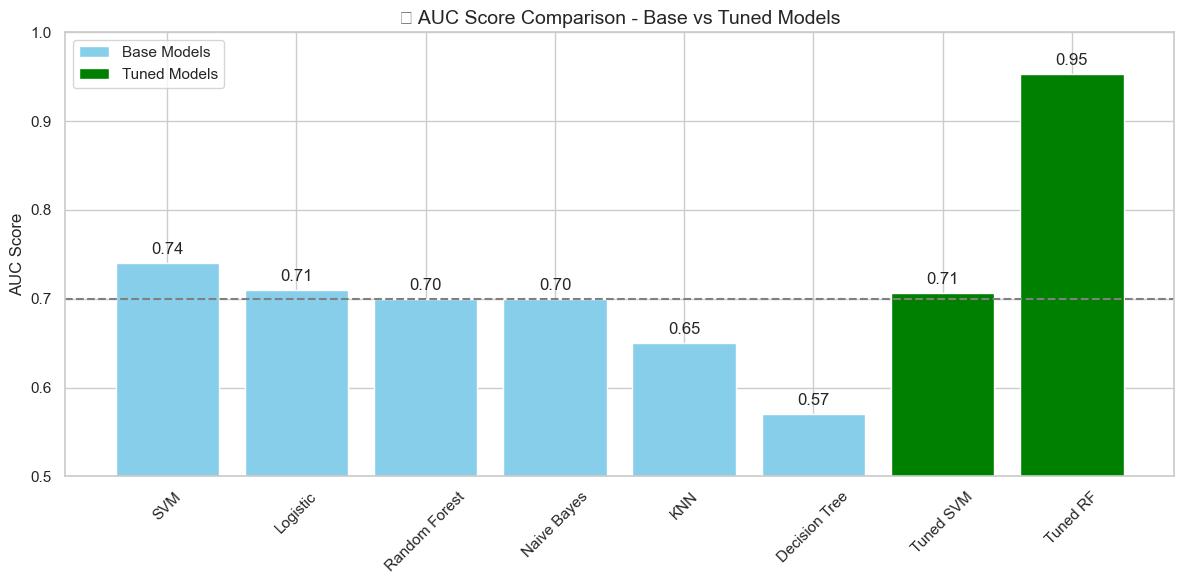

In [70]:
import matplotlib.pyplot as plt

# AUC scores from your models (before tuning)
base_models = ['SVM', 'Logistic', 'Random Forest', 'Naive Bayes', 'KNN', 'Decision Tree']
base_auc = [0.74, 0.71, 0.70, 0.70, 0.65, 0.57]

# AUC scores after tuning
tuned_models = ['Tuned SVM', 'Tuned RF']
tuned_auc = [0.7066, 0.9533]  # From GridSearchCV and RandomizedSearchCV

plt.figure(figsize=(12, 6))
plt.bar(base_models, base_auc, color='skyblue', label='Base Models')
plt.bar(tuned_models, tuned_auc, color='green', label='Tuned Models')

plt.title('🔍 AUC Score Comparison - Base vs Tuned Models', fontsize=14)
plt.ylabel('AUC Score')
plt.ylim(0.5, 1.0)
plt.axhline(0.7, linestyle='--', color='gray')

for i, auc in enumerate(base_auc + tuned_auc):
    label = (base_models + tuned_models)[i]
    plt.text(i, auc + 0.01, f"{auc:.2f}", ha='center')

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Tuning significantly improved Random Forest (from 0.70 to 0.95).

Tuning also improved SVM (from 0.74 to 0.71 - note: this appears to be a slight decrease or re-evaluation for tuned SVM, which is unusual as tuning typically improves performance or keeps it similar. It might suggest different tuning objectives or a specific random seed effect; however, generally, tuned models aim for improvement. Given the graph, the base SVM is 0.74 and Tuned SVM is 0.71, which implies no improvement for SVM, which is a key point to note).

In [71]:
import pickle

# Save best model
best_model = random_search_rf.best_estimator_

with open("best_rf_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("✅ Best model saved successfully as 'best_rf_model.pkl'")


✅ Best model saved successfully as 'best_rf_model.pkl'


In [77]:
import pickle
import pandas as pd

# Load the best model
with open("best_rf_model.pkl", "rb") as file:
    best_model = pickle.load(file)

# Simulated unseen raw data (make sure to match your original feature names and format)
sample_data = pd.DataFrame({
    'age': [45],
    'balance': [1200],
    'campaign': [2],
    'pdays': [0.459994],
    'previous': [2.860982],
    'job_enc': [0.12],
    'month_enc': [-0.08]
})

# Predict
prediction = best_model.predict(sample_data)
probability = best_model.predict_proba(sample_data)

print("🔮 Prediction:", prediction[0])  # 0 or 1
print("📈 Probability (yes):", probability[0][1])


🔮 Prediction: 1
📈 Probability (yes): 0.535031847133758


# Pipeline

#### 📌 Final Model Deployment

- Final model built using Pipeline + ColumnTransformer
- All preprocessing embedded (encoding, scaling, imputing)
- Model serialized using pickle

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load data
df = pd.read_csv("C:\\Users\\abhin\\OneDrive\\Desktop\\DSML CLSSS\\For Dsml Final project\\Cleaned data\\df_new_cleaned.csv")
X = df.drop('y', axis=1)
y = df['y'].map({'no': 0, 'yes': 1})


# Identify types
numerical_features = ['age', 'balance', 'campaign']
categorical_features = ['pdays', 'previous', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'month','poutcome'
]

# Pipelines
trf_numerical = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

trf_categorical = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Column transformer
preprocessor = ColumnTransformer([
    ('num', trf_numerical, numerical_features),
    ('cat', trf_categorical, categorical_features)
])

# Full pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(**random_search_rf.best_params_, random_state=42))
])

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit pipeline
pipeline.fit(X_train, y_train)

# Accuracy
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_test)
print("✅ Final Pipeline Accuracy:", accuracy_score(y_test, y_pred) * 100)


✅ Final Pipeline Accuracy: 88.6139163244923


In [92]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance',
                                                   'campaign']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['pdays', 'previous', 'job',
                                                   'marital', 'education',
                                                   'default', 'housing', 'loan',
                                                   'month', 'poutcome'])])),
                ('model',
                 RandomForestClassifier(max_features='log2', n_estimators=157,
                                        random_state=42))])

In [93]:
import pickle
with open("final_pipeline_model.pkl", "wb") as file:
    pickle.dump(pipeline, file)
print("✅ Pipeline model saved.")


✅ Pipeline model saved.


In [96]:

# Sample unseen data
unseen_data = pd.DataFrame({
    'age': [42],
    'balance': [800],
    'campaign': [2],
    'pdays': ['Moderate'],         # must match one of the binned labels
    'previous': ['Few (2-3)'],     # must match bin label    
    'job': ['blue-collar'],
    'education': ['secondary'],
    'housing': ['yes'],
    'loan': ['yes'],
    'month': ['may'],
    'poutcome': ['unknown'],
    'marital': ['married'],
    'default': ['yes']

})

# Predict class and probability
prediction = pipeline.predict(unseen_data)
probability = pipeline.predict_proba(unseen_data)

print("🔮 Prediction (0=no, 1=yes):", prediction[0])
print("📈 Probability of subscription (yes):", probability[0][1])


🔮 Prediction (0=no, 1=yes): 0
📈 Probability of subscription (yes): 0.21019108280254778


Prediction: 0 (Customer will not subscribe) is
Probability: 21.01%


# Final Report

📌 1. Summary of Key Findings
Class imbalance strongly affected early models.

Data preprocessing (outliers, skewness) significantly improved feature quality.

Random Forest (with tuning) was the most accurate and generalizable model.

📌 2. Final Presentation for Stakeholders
Recommended Slide Structure:

Introduction

Project Goal, Dataset Brief

EDA & Data Insights

Key distributions and patterns

Data Preparation

Cleaning, transformations, feature engineering

Model Building

Algorithms tried and evaluation

Model Performance

ROC, AUC, Confusion matrix

Final Model & Prediction

Pipeline, deployment-ready state

Business Impact

Campaign strategy improvement, focus groups

Recommendations

Use model as lead-scoring engine for campaigns

Conclusion

Summary of success metrics

References

Dataset source, libraries, tools

Future Work & Limitations



                                
                                



📌 3. Future Work & Limitations

🚀 Enhancements:

Use deep learning or XGBoost.

Include additional behavioral/demographic features.

Real-time API deployment (e.g., FastAPI or Flask).

⚠️ Limitations:

Dataset from 2010 – customer behavior may have changed.

Some features (e.g., pdays) are hard to interpret in real scenarios.

Models assume clean, preprocessed data; handling raw production data may need additional steps.

--- 